## AUTORES Carlos Ramos Mateos y Adrián Rubio Pintado


# Parte 1: Programación en GPU

## Tutorial suma de vectores 

 Click  Entorno de ejecución > Cambiar tipo de Entorno >  Accelerador por Hardware GPU.

## Entorno de Ejecución
Compilador y GPU

Comprobamos la version del compilador cuda y que GPU tenemos disponible

In [ ]:
!nvcc --version
!nvidia-smi

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
Mon Nov  1 16:05:52 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.29.05    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P8    34W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |            

Directorio de trabajo

In [ ]:
!pwd
!ls -la .

/content
total 16
drwxr-xr-x 1 root root 4096 Oct 26 13:34 .
drwxr-xr-x 1 root root 4096 Nov  1 16:02 ..
drwxr-xr-x 4 root root 4096 Oct 26 13:33 .config
drwxr-xr-x 1 root root 4096 Oct 26 13:34 sample_data


Creamos un subditectorio para el trabajo con cuda

In [ ]:
!mkdir workcuda
!ls -la 

total 20
drwxr-xr-x 1 root root 4096 Nov  1 16:05 .
drwxr-xr-x 1 root root 4096 Nov  1 16:02 ..
drwxr-xr-x 4 root root 4096 Oct 26 13:33 .config
drwxr-xr-x 1 root root 4096 Oct 26 13:34 sample_data
drwxr-xr-x 2 root root 4096 Nov  1 16:05 workcuda


## Suma en la CPU
Directorio de trabajo /content/workcuda


Cambiar al directorio de trabjo

In [ ]:
%cd /content/workcuda/
!ls -la
!pwd

/content/workcuda
total 8
drwxr-xr-x 2 root root 4096 Nov  1 16:05 .
drwxr-xr-x 1 root root 4096 Nov  1 16:05 ..
/content/workcuda


Escribir en el directorio actual el fichero suma0.cu


In [ ]:
%%writefile suma0.cu

#include <iostream>
#include <math.h>

#include <time.h>
#include <sys/time.h>

void add(int n, float *x, float *y) {

  for (int i =0; i < n; i++ ){
    y[i]=x[i]+y[i];
  }
}


int main(void) {
    
    int N = 1 <<20;  // N = 2^20 = 1024*1024= 1.048.576
    struct timeval tv;
	  unsigned long long start;

    float *x = new float[N];
    float *y = new float[N]; 
    
    for (int i =0; i < N; i++ ){
        x[i]= 1.0f;
        y[i]= 2.0f;
    }
    gettimeofday(&tv, NULL); 
    start=tv.tv_sec*1000000+tv.tv_usec;
   
    add(N, x, y);
  
    gettimeofday(&tv, NULL); 
	  printf("Tiempo del cálculo : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);
  
    float maxError = 0.0f;
    int contError = 0;
   
    for (int i=0; i <N; i++){
      maxError=fmax(maxError,fabs(y[i]-3.0f));
      if (y[i] != 3.0) contError++; 
    }
    std::cout << "suma de " << N << " Elementos" << std::endl;
    std::cout << "Número de Errores: " <<contError << std::endl;
    std::cout << "Max error: " <<maxError << std::endl;

    delete [] x;
    delete [] y;

    return 0;
}

Writing suma0.cu


Comprobamos el fichero que se ha escrito

In [ ]:
!ls -la
%cat suma0.cu

total 12
drwxr-xr-x 2 root root 4096 Nov  1 16:06 .
drwxr-xr-x 1 root root 4096 Nov  1 16:05 ..
-rw-r--r-- 1 root root 1090 Nov  1 16:06 suma0.cu

#include <iostream>
#include <math.h>

#include <time.h>
#include <sys/time.h>

void add(int n, float *x, float *y) {
    
    for (int i =0; i < n; i++ ){
        y[i]=x[i]+y[i];
    }
}


int main(void) {
    
    int N = 1 <<20;  // N = 2^20 = 1024*1024= 1.048.576
    struct timeval tv;
	  unsigned long long start;

    float *x = new float[N];
    float *y = new float[N]; 
    
    for (int i =0; i < N; i++ ){
        x[i]= 1.0f;
        y[i]= 2.0f;
    }
    gettimeofday(&tv, NULL); 
    start=tv.tv_sec*1000000+tv.tv_usec;
   
    add(N, x, y);
  
    gettimeofday(&tv, NULL); 
	  printf("Tiempo del cálculo : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);
  
   float maxError = 0.0f;
   int contError = 0;
   
   for (int i=0; i <N; i++){
       maxError=fmax(maxError,fabs(y[i]-3.0f));
       if (y[i] != 3.0) contError++; 
   

Compilamos el archivo suma0.cu

In [ ]:
!/usr/local/cuda/bin/nvcc -arch=sm_37 -rdc=true suma0.cu -o suma0 -lcudadevrt

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).


In [ ]:
!ls

suma0  suma0.cu


Corremos el fichero ejecutable

In [ ]:
!./suma0

Tiempo del cálculo : 3.968000 ms
suma de 1048576 Elementos
Número de Errores: 0
Max error: 0


## Suma en la GPU con un solo thread (serie)

Escribir en el directorio actual el fichero suma1.cu


In [ ]:
%%writefile suma1.cu

#include <iostream>
#include <math.h>

#include <time.h>
#include <sys/time.h>

__global__ void add(int n, float *x, float *y) {

  for (int i =0; i < n; i++ ){
    y[i]=x[i]+y[i];
  }
}

int main(void) {
  
  int N = 1 <<20;  // N = 2^20 = 1024*1024= 1.048.576
  struct timeval tv;
	unsigned long long start;
  float *x; // = new float[N];
  float *y; // = new float[N]; 

  cudaMallocManaged(&x, N*sizeof(float));
  cudaMallocManaged(&y, N*sizeof(float));
    
  for (int i =0; i < N; i++ ){
    x[i]= 1.0f;
    y[i]= 2.0f;
  }

  gettimeofday(&tv, NULL); 
  start=tv.tv_sec*1000000+tv.tv_usec;
   
  add<<<1,1>>>(N, x, y);
  
  gettimeofday(&tv, NULL); 
	printf("Tiempo del cálculo : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);
  
  cudaDeviceSynchronize();
  gettimeofday(&tv, NULL); 
	printf("Tiempo con el synchronize  : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);
  
  float maxError = 0.0f;
  int contError = 0;
   
  for (int i=0; i <N; i++){
    maxError=fmax(maxError,fabs(y[i]-3.0f));
    if (y[i] != 3.0) contError++; 
  }
   
  std::cout << "suma de " << N << " Elementos" << std::endl;
  std::cout << "Número de Errores: " <<contError << std::endl;
  std::cout << "Max error: " <<maxError << std::endl;

  cudaFree (x);
  cudaFree (y);
   
  return 0;
}

Writing suma1.cu


Compilamos el archivo suma1.cu

In [ ]:
!ls -la

total 712
drwxr-xr-x 2 root root   4096 Nov  1 16:14 .
drwxr-xr-x 1 root root   4096 Nov  1 16:05 ..
-rwxr-xr-x 1 root root 711464 Nov  1 16:07 suma0
-rw-r--r-- 1 root root   1090 Nov  1 16:06 suma0.cu
-rw-r--r-- 1 root root   1369 Nov  1 16:14 suma1.cu


In [ ]:
!/usr/local/cuda/bin/nvcc -arch=sm_37 -rdc=true suma1.cu -o suma1 -lcudadevrt

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).


In [ ]:
!/usr/local/cuda/bin/nvcc -rdc=true suma1.cu -o suma1sinarch -lcudadevrt

In [ ]:
!ls

suma0  suma0.cu  suma1	suma1.cu  suma1sinarch


Corremos el fichero ejecutable compilado sin flag -arch (Modelo de computación de la GPU)

In [ ]:
!./suma1sinarch

Tiempo del cálculo : 0.004000 ms
Tiempo con el synchronize  : 0.045000 ms
suma de 1048576 Elementos
Número de Errores: 1048576
Max error: 1


No está funcionando correctamente. 

Ejecutamos el compilado con flag -arch (Modelo de computación de la GPU)

In [ ]:
!./suma1

Tiempo del cálculo : 1.431000 ms
Tiempo con el synchronize  : 377.629000 ms
suma de 1048576 Elementos
Número de Errores: 0
Max error: 0


## P1 ¿Qué característica del modelo de computación esta siendo necesaria? 

Es necesario añadir el flag -arch=sm_37 espeficicando la arquitectura del modelo, ya que estamos utilizando la memoria compartida, y en adición para conseguir un resultado correcto, un syncronize de la misma para evitar carrera de datos. Si al compilador no le indicamos que estamos utilizando esta arquitectura con dichas carácteristicas, lo ignorará y no manejará correctamente la sincronización, dando como resultado datos erróneos como ya hemos visto.

Hacemos el profile de ejecución

In [ ]:
!nvprof ./suma1

==344== NVPROF is profiling process 344, command: ./suma1
==344== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
Tiempo del cálculo : 1.219000 ms
Tiempo con el synchronize  : 307.565000 ms
suma de 1048576 Elementos
Número de Errores: 0
Max error: 0
==344== Profiling application: ./suma1
==344== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:  100.00%  306.31ms         1  306.31ms  306.31ms  306.31ms  add(int, float*, float*)
      API calls:   55.43%  306.32ms         1  306.32ms  306.32ms  306.32ms  cudaDeviceSynchronize
                   44.07%  243.52ms         2  121.76ms  604.46us  242.92ms  cudaMallocManaged
                    0.22%  1.2071ms         1  1.2071ms  1.2071ms  1.2071ms  cudaLaunchKernel
                    0.17%  934.93us         2  467.47us  444.60us  490.34us  cudaFree
                    0.08%  438.17us         1  438.17us  438.17us  438.17us  cuDeviceTotalMem
 

## P2 ¿La suma ha tardado más  o menos que en la CPU? Justifique como está funcionando.

En tiempo solo de la operación de suma, ha tardado menos la GPU, ya que ha paralelizado la operación. Teniendo un tiempo de cálculo en la CPU de *3.968000 ms* mientras que en la GPU es de *1.219000 ms*.
Sin embargo, dado que es necesario hacer el synchronize, en caso de que hagamos la operación con la GPU para evitar la carrera de datos, que nos suma un tiempo de *306.32ms*, haciendo un total de *307.565000 ms* necesarios para realizar el cálculo(de forma correcta) y haciéndolo más lento al final que con la CPU.

## Suma en la GPU con mas threads <<<1,256>>. Paralelismo sin aprovechar y posible Data Race

NOTA: Con este ejercicio se pretende comprobar un funcionamiento no deseado

Escribir en el directorio actual el fichero suma1.cu


In [ ]:
%%writefile suma2.cu

#include <iostream>
#include <math.h>
#include <time.h>
#include <sys/time.h>

__global__ void add(int n, float *x, float *y) {
    
    for (int i =0; i < n; i++ ){
        y[i]=x[i]+y[i];
    }
}

int main(void) {
    
    int N = 1 <<20;  // N = 2^20 = 1024*1024= 1.048.576
    struct timeval tv;
	  unsigned long long start;
    float *x; // = new float[N];
    float *y; // = new float[N]; 

    cudaMallocManaged(&x, N*sizeof(float));
    cudaMallocManaged(&y, N*sizeof(float));
    
    for (int i =0; i < N; i++ ){
        x[i]= 1.0f;
        y[i]= 2.0f;
    }

    gettimeofday(&tv, NULL); 
    start=tv.tv_sec*1000000+tv.tv_usec;
   
    add<<<1,256>>>(N, x, y);
  
    gettimeofday(&tv, NULL); 
	  printf("Tiempo del cálculo suma2 : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);
  
    cudaDeviceSynchronize();
    gettimeofday(&tv, NULL); 
	  printf("Tiempo con el synchronize  : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);


    float maxError = 0.0f;
    int contError = 0;
   
    for (int i=0; i <N; i++){
      maxError=fmax(maxError,fabs(y[i]-3.0f));
      if (y[i] != 3.0) contError++; 
    }
   
    std::cout << "Suma de " << N << " elementos" << std::endl;
    std::cout << "Número de errores: " <<contError << std::endl;
    std::cout << "Max error: " <<maxError << std::endl;
  
    cudaFree (x);
    cudaFree (y);
  
    return 0;
}

Overwriting suma2.cu


In [ ]:
%ls

suma0*  suma0.cu  suma1*  suma1.cu  suma1sinarch*  suma2*  suma2.cu


Compilamos el archivo suma1.cu

In [ ]:
!/usr/local/cuda/bin/nvcc -arch=sm_37 -rdc=true suma2.cu -o suma2 -lcudadevrt

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).


In [ ]:
!ls

suma0  suma0.cu  suma1	suma1.cu  suma1sinarch	suma2  suma2.cu


Corremos el fichero ejecutable

In [ ]:
!./suma2

Tiempo del cálculo suma2 : 1.482000 ms
Tiempo con el synchronize  : 411.170000 ms
Suma de 1048576 elementos
Número de errores: 0
Max error: 0


Hacemos el profile de ejecución

In [ ]:
!nvprof ./suma2

==642== NVPROF is profiling process 642, command: ./suma2
==642== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
Tiempo del cálculo suma2 : 1.237000 ms
Tiempo con el synchronize  : 339.235000 ms
Suma de 1048576 elementos
Número de errores: 0
Max error: 0
==642== Profiling application: ./suma2
==642== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:  100.00%  337.97ms         1  337.97ms  337.97ms  337.97ms  add(int, float*, float*)
      API calls:   60.12%  337.97ms         1  337.97ms  337.97ms  337.97ms  cudaDeviceSynchronize
                   39.38%  221.38ms         2  110.69ms  677.18us  220.70ms  cudaMallocManaged
                    0.22%  1.2250ms         1  1.2250ms  1.2250ms  1.2250ms  cudaLaunchKernel
                    0.16%  888.24us         2  444.12us  410.24us  478.00us  cudaFree
                    0.08%  461.85us         1  461.85us  461.85us  461.85us  cuDeviceTota

##P3 ¿La suma ha funcionado? ¿ Ha tardado más o menos que en el caso anterior? Justifique como está funcionando.
Sí, ha funcionado. Ha tardado más, en este caso obtenemos un tiempo total de *339.235000 ms* mientras que en el caso anterior obteníamos una marca de *307.565000 ms* Es decir, que ha tardado algo más. Pero en ningún caso esto significa que este implementado bien, ya que si nos fijamos en la función kernel usada en este caso, se puede apreciar que no comtempla paralelismo.

En el caso anterior teníamos un hilo de ejecución que realmente es equivalente a no paralelizar porque realiza la operación secuencialmente en un único bloque de un hilo.
La diferencia con el caso actual con 256 hilos y 1 bloque, radica en que sigue sin estar bien paralelizado realmente, ya que el modo en que se reparten los índices los hilos se hace de un modo totalmente desorganizado, y eso implica que a la hora de hacer sincronización en la memoria compartida, esto lleve mucho más tiempo.
### Explique si podrían generarse situaciones de funcionamiento incorrecto.
No debería, ya que se hace un synchronize, que evita las posibles carreras de datos.

## Suma en la GPU con mas threads <<<256,1>> sin paralelismo y Data Race

NOTA: Con este ejercicio se pretende comprobar un funcionamiento no deseado

Escribir en el directorio actual el fichero suma3.cu


In [ ]:
%%writefile suma3.cu

#include <iostream>
#include <math.h>
#include <time.h>
#include <sys/time.h>


__global__ void add(int n, float *x, float *y) {
    
    for (int i =0; i < n; i++ ){
        y[i]=x[i]+y[i];
    }
}


int main(void) {
    
    int N = 1 <<20;  // N = 2^20 = 1024*1024= 1.048.576
    struct timeval tv;
	  unsigned long long start;
    float *x; // = new float[N];
    float *y; // = new float[N]; 

    cudaMallocManaged(&x, N*sizeof(float));
    cudaMallocManaged(&y, N*sizeof(float));
    
    for (int i =0; i < N; i++ ){
        x[i]= 1.0f;
        y[i]= 2.0f;
    }

    gettimeofday(&tv, NULL); 
    start=tv.tv_sec*1000000+tv.tv_usec;
   
    add<<<256,1>>>(N, x, y);
  
    gettimeofday(&tv, NULL); 
	  printf("Tiempo del cálculo suma3 : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);
  
   cudaDeviceSynchronize();
    gettimeofday(&tv, NULL); 
	  printf("Tiempo con el synchronize  : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);

   float maxError = 0.0f;
   int contError = 0;
   
   for (int i=0; i <N; i++){
       maxError=fmax(maxError,fabs(y[i]-3.0f));
       if (y[i] != 3.0) contError++; 
   }
   std::cout << "suma de " << N << " Elementos" << std::endl;
   std::cout << "Número de Errores: " <<contError << std::endl;
   std::cout << "Max error: " <<maxError << std::endl;

   cudaFree (x);
   cudaFree (y);
   
   return 0;
}

Writing suma3.cu


In [ ]:
!ls

suma0  suma0.cu  suma1	suma1.cu  suma1sinarch	suma2  suma2.cu  suma3.cu


Compilamos el archivo suma3.cu

In [ ]:
!/usr/local/cuda/bin/nvcc -arch=sm_37 -rdc=true suma3.cu -o suma3 -lcudadevrt

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).


In [ ]:
!ls

suma0	  suma1     suma1sinarch  suma2.cu  suma3.cu
suma0.cu  suma1.cu  suma2	  suma3


Corremos el fichero ejecutable

In [ ]:
!./suma3

Tiempo del cálculo suma3 : 1.429000 ms
Tiempo con el synchronize  : 818.425000 ms
suma de 1048576 Elementos
Número de Errores: 1048576
Max error: 223


Ejecutamos varias veces

In [ ]:
!./suma3

Tiempo del cálculo suma3 : 1.451000 ms
Tiempo con el synchronize  : 783.738000 ms
suma de 1048576 Elementos
Número de Errores: 1048576
Max error: 218


In [ ]:
!./suma3

Tiempo del cálculo suma3 : 1.186000 ms
Tiempo con el synchronize  : 639.327000 ms
suma de 1048576 Elementos
Número de Errores: 1048576
Max error: 217


Hacemos el profile de ejecución

In [ ]:
!nvprof ./suma3

==926== NVPROF is profiling process 926, command: ./suma3
==926== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
Tiempo del cálculo suma3 : 1.184000 ms
Tiempo con el synchronize  : 655.783000 ms
suma de 1048576 Elementos
Número de Errores: 1048576
Max error: 215
==926== Profiling application: ./suma3
==926== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:  100.00%  654.58ms         1  654.58ms  654.58ms  654.58ms  add(int, float*, float*)
      API calls:   74.88%  654.57ms         1  654.57ms  654.57ms  654.57ms  cudaDeviceSynchronize
                   24.82%  216.99ms         2  108.50ms  560.74us  216.43ms  cudaMallocManaged
                    0.13%  1.1581ms         1  1.1581ms  1.1581ms  1.1581ms  cudaLaunchKernel
                    0.09%  818.86us         2  409.43us  384.00us  434.86us  cudaFree
                    0.05%  463.90us         1  463.90us  463.90us  463.90us  cuDe

##P5 La suma ha tardado más tiempo y con errores ¿Qué está pasando?

Tarda un total de 642.330000 ms, algo más que los 628.041000 ms del caso anterior. Si nos fijamos en las tres ejecuciones, podemos observar que se obtienen siempre tantos fallos como suma de elementos realizadas (1048576 elementos) por lo que el nº errores es constante.

Por otro lado, el máximo error oscila alrededor del 215, un número relativamente similar al nº de bloques que usamos.

Creemos que los errores se producen debido a que la función cudaDeviceSynchronize() tan solo garantiza la sincronización en los threads pertenecientes a un mismo bloque, es decir solo afecta a la memoria compartida, por lo que no se aplicaría a la memoria global que es la que se comunican(comparten) los diferentes bloques.

Por lo tanto, es necesario algo más para poder ejecutar este código con paralelismo.

## Suma en la GPU con paralelismo <<<1,256>>

Escribir en el directorio actual el fichero suma4.cu


In [ ]:
%%writefile suma4.cu

#include <iostream>
#include <math.h>
#include <time.h>
#include <sys/time.h>

__global__
void add(int n, float *x, float *y)
{
  int index = threadIdx.x;
  int stride = blockDim.x;
  for (int i = index; i < n; i += stride)
      y[i] = x[i] + y[i];
}

//__global__ void add(int n, float *x, float *y) {
//    for (int i =0; i < n; i++ ){
//        y[i]=x[i]+y[i];
//    }
//}

int main(void) {
    
    int N = 1 <<20;  // N = 2^20 = 1024*1024= 1.048.576
    struct timeval tv;
	  unsigned long long start;
    float *x; // = new float[N];
    float *y; // = new float[N]; 

  // Allocate Unified Memory -- accessible from CPU or GPU
    cudaMallocManaged(&x, N*sizeof(float));
    cudaMallocManaged(&y, N*sizeof(float));
    
    for (int i =0; i < N; i++ ){
        x[i]= 1.0f;
        y[i]= 2.0f;
    }

    gettimeofday(&tv, NULL); 
    start=tv.tv_sec*1000000+tv.tv_usec;
   
    add<<<1,256>>>(N, x, y);
  
    gettimeofday(&tv, NULL); 
	  printf("Tiempo del cálculo suma 4 : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);
  
   cudaDeviceSynchronize();
    gettimeofday(&tv, NULL); 
	  printf("Tiempo con el synchronize  : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);

    cudaDeviceSynchronize();

   float maxError = 0.0f;
  int contError = 0;
   
   for (int i=0; i <N; i++){
       maxError=fmax(maxError,fabs(y[i]-3.0f));
       if (y[i] != 3.0) contError++; 
   }
   std::cout << "Suma de " << N << " elementos" << std::endl;
   std::cout << "Número de errores: " <<contError << std::endl;
   std::cout << "Max error: " <<maxError << std::endl;
  
 
  // Free memory
   cudaFree (x);
   cudaFree (y);
   
   return 0;
}

Writing suma4.cu


In [ ]:
!ls

sample_data  suma4.cu


Compilamos el archivo suma4.cu

In [ ]:
!/usr/local/cuda/bin/nvcc -arch=sm_37 -rdc=true suma4.cu -o suma4 -lcudadevrt

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).


In [ ]:
!ls

sample_data  suma4  suma4.cu


Corremos el fichero ejecutable

In [ ]:
!./suma4

Tiempo del cálculo suma 4 : 1.387000 ms
Tiempo con el synchronize  : 4.214000 ms
Suma de 1048576 elementos
Número de errores: 0
Max error: 0


Hacemos el profile de ejecución

In [ ]:
!nvprof ./suma4

==163== NVPROF is profiling process 163, command: ./suma4
==163== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
Tiempo del cálculo suma 4 : 1.447000 ms
Tiempo con el synchronize  : 4.266000 ms
Suma de 1048576 elementos
Número de errores: 0
Max error: 0
==163== Profiling application: ./suma4
==163== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:  100.00%  2.8015ms         1  2.8015ms  2.8015ms  2.8015ms  add(int, float*, float*)
      API calls:   97.85%  282.03ms         2  141.02ms  799.64us  281.24ms  cudaMallocManaged
                    0.97%  2.7936ms         2  1.3968ms  6.0970us  2.7875ms  cudaDeviceSynchronize
                    0.50%  1.4351ms         1  1.4351ms  1.4351ms  1.4351ms  cudaLaunchKernel
                    0.39%  1.1102ms         2  555.12us  484.91us  625.33us  cudaFree
                    0.20%  575.13us         1  575.13us  575.13us  575.13us  cuDeviceTotal

## P6 Compare con el tiempo de ejecución de un solo Thread y con la ejecución en CPU.¿Que puede deducir de estos comportamientos?

Si observamos exclusivamente el tiempo de cálculo y comparamos con el ejemplo de un único bloque y 256 hilos por bloque podemos ver que los 1.387000 ms(4.266000 ms con syncronize) es ligeramente superior a los 3.968000 ms que teníamos inicialmente en el caso de CPU.

A pesar de este resultado desfavorable, podemos ver que la tendencia a mejorado respecto a los 411.170000 ms que teníamos en el caso del paralelismo sin aprovechar, lo cual es una mejora del rendimiento de x100.

###¿Se puede seguir optimizando?

Un rotundo sí, para empezar podemos comenzar aumentar el nº de bloques para aumentar la carga de trabajo a paralelizar, esto supondrá una mejora siempre y cuando nuestro procesador/GPU continue teniendo cores libres.

Otra opción, tal como se mencionó en clase una opción sería continuar aumentando el número de hilos(si la operación es "compleja" y "paralelizable") por lo que sería una buena opción comprobar su escalabilidad al continuar aumentando el nº de hilos, ya que los cores actuales pueden llegar a admitir hasta 1024 hilos por core de GPU.

Otra posibilidad sería aplicar Coalescing a la función kernel, algo que haremos en secciones inferiores. 

También se podría tratar de aplicar Latency Hiding para tratar de reducir algo más los tiempos, ya que gran parte de los tiempos actualmente se nos va en las sincronizaciónes de los datos.

Divergence-free mapping nos permitiría ahorrar en recursos como el nº de hilos usados, pero no así en tiempo, ya que seguirámos necesitando un mínimo de ciclos.

Dynamic Warp Formation/Merging: al estar operando todo el rato una misma operación(en nuestro caso la suma) creemos que es posible aplicar metodos de warp dinamicos que nos ayuden a aprovechar mejor los recursos.

## P7 Realice el paralelismo correspondiente a ls Suma en la GPU con paralelismo <<<256,1>> y estudie el comportamiento de los tiempos de ejecución.

In [ ]:
%%writefile suma4.cu

#include <iostream>
#include <math.h>
#include <time.h>
#include <sys/time.h>

__global__
void add(int n, float *x, float *y)
{
  int index = threadIdx.x;
  int stride = blockDim.x;
  for (int i = index; i < n; i += stride)
      y[i] = x[i] + y[i];
}

int main(void) {
    
    int N = 1 <<20;  // N = 2^20 = 1024*1024= 1.048.576
    struct timeval tv;
	  unsigned long long start;
    float *x; // = new float[N];
    float *y; // = new float[N]; 

  // Allocate Unified Memory -- accessible from CPU or GPU
    cudaMallocManaged(&x, N*sizeof(float));
    cudaMallocManaged(&y, N*sizeof(float));
    
    for (int i =0; i < N; i++ ){
        x[i]= 1.0f;
        y[i]= 2.0f;
    }

    gettimeofday(&tv, NULL); 
    start=tv.tv_sec*1000000+tv.tv_usec;
   
    add<<<256,1>>>(N, x, y);
  
    gettimeofday(&tv, NULL); 
	  printf("Tiempo del cálculo suma 4 : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);
  
   cudaDeviceSynchronize();
    gettimeofday(&tv, NULL); 
	  printf("Tiempo con el synchronize  : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);

    cudaDeviceSynchronize();

   float maxError = 0.0f;
  int contError = 0;
   
   for (int i=0; i <N; i++){
       maxError=fmax(maxError,fabs(y[i]-3.0f));
       if (y[i] != 3.0) contError++; 
   }
   std::cout << "Suma de " << N << " elementos" << std::endl;
   std::cout << "Número de errores: " <<contError << std::endl;
   std::cout << "Max error: " <<maxError << std::endl;
  
 
  // Free memory
   cudaFree (x);
   cudaFree (y);
   
   return 0;
}

Overwriting suma4.cu


In [ ]:
!ls

sample_data  suma4  suma4.cu  suma5  suma5.cu


Compilamos el archivo suma4.cu

In [ ]:
!/usr/local/cuda/bin/nvcc -arch=sm_37 -rdc=true suma4.cu -o suma4 -lcudadevrt

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).


In [ ]:
!ls

sample_data  suma4  suma4.cu  suma5  suma5.cu


Corremos el fichero ejecutable

In [ ]:
!./suma4

Tiempo del cálculo suma 4 : 1.435000 ms
Tiempo con el synchronize  : 887.820000 ms
Suma de 1048576 elementos
Número de errores: 1048575
Max error: 219


Hacemos el profile de ejecución

In [ ]:
!nvprof ./suma4

==577== NVPROF is profiling process 577, command: ./suma4
==577== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
Tiempo del cálculo suma 4 : 1.153000 ms
Tiempo con el synchronize  : 756.925000 ms
Suma de 1048576 elementos
Número de errores: 1048575
Max error: 217
==577== Profiling application: ./suma4
==577== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:  100.00%  755.74ms         1  755.74ms  755.74ms  755.74ms  add(int, float*, float*)
      API calls:   78.11%  755.75ms         2  377.87ms  11.873us  755.73ms  cudaDeviceSynchronize
                   21.61%  209.10ms         2  104.55ms  551.21us  208.55ms  cudaMallocManaged
                    0.12%  1.1409ms         1  1.1409ms  1.1409ms  1.1409ms  cudaLaunchKernel
                    0.09%  872.05us         2  436.03us  385.41us  486.64us  cudaFree
                    0.05%  476.68us         1  476.68us  476.68us  476.68us  cuD

Si reutilizamos el código de apartados anteriores vemos que no funciona, esto es porque la función kernel add() que estamos usando en este momento no garantiza el paralelismo y puede conducir a un caso de DataRace, tal como se veía en apartados anteriores.

Esta incompatibilidad se debe a que ahora en vez de paralelizar nuestra función en un único bloque con 256 hilos por bloque que pueden compartir información a traves de la memoria compartida interna al propio bloque, lo hacemos con 256 bloques de un único hilo que deben compartir su información por memoria global, la cual no parece poder sincronizarse a traves de la función cudaDeviceSynchronize(), ya que esta función opera a nivel de memoria compartida evitando la carrera de datos entre hilos. 

Para ello, simplemente deberemos modificar el código de la suma para que la función admita paralelismo entre distintos kernel(aplicando Coalescing a la función), tal como sería la propuesta realizada por el tutorial en los apartados siguientes.



In [ ]:
%%writefile suma4.cu

#include <iostream>
#include <math.h>
#include <time.h>
#include <sys/time.h>

__global__
void add(int n, float *x, float *y)
{
  int index = blockIdx.x * blockDim.x + threadIdx.x;
  int stride = blockDim.x * gridDim.x;
 
  for (int i = index; i < n; i += stride)
    y[i] = x[i] + y[i];
}

int main(void) {
    
    int N = 1 <<20;  // N = 2^20 = 1024*1024= 1.048.576
    struct timeval tv;
	  unsigned long long start;
    float *x; // = new float[N];
    float *y; // = new float[N]; 

  // Allocate Unified Memory -- accessible from CPU or GPU
    cudaMallocManaged(&x, N*sizeof(float));
    cudaMallocManaged(&y, N*sizeof(float));
    
    for (int i =0; i < N; i++ ){
        x[i]= 1.0f;
        y[i]= 2.0f;
    }

    gettimeofday(&tv, NULL); 
    start=tv.tv_sec*1000000+tv.tv_usec;
   
    add<<<256,1>>>(N, x, y);
  
    gettimeofday(&tv, NULL); 
	  printf("Tiempo del cálculo suma 4 : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);
  
   cudaDeviceSynchronize();
    gettimeofday(&tv, NULL); 
	  printf("Tiempo con el synchronize  : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);

    cudaDeviceSynchronize();

   float maxError = 0.0f;
  int contError = 0;
   
   for (int i=0; i <N; i++){
       maxError=fmax(maxError,fabs(y[i]-3.0f));
       if (y[i] != 3.0) contError++; 
   }
   std::cout << "Suma de " << N << " elementos" << std::endl;
   std::cout << "Número de errores: " <<contError << std::endl;
   std::cout << "Max error: " <<maxError << std::endl;
  
 
  // Free memory
   cudaFree (x);
   cudaFree (y);
   
   return 0;
}

Writing suma4.cu


In [ ]:
!ls

sample_data  suma4.cu


Compilamos el archivo suma4.cu

In [ ]:
!/usr/local/cuda/bin/nvcc -arch=sm_37 -rdc=true suma4.cu -o suma4 -lcudadevrt

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).


In [ ]:
!ls

sample_data  suma4  suma4.cu


Corremos el fichero ejecutable

In [ ]:
!./suma4

Tiempo del cálculo suma 4 : 1.585000 ms
Tiempo con el synchronize  : 6.951000 ms
Suma de 1048576 elementos
Número de errores: 0
Max error: 0


Hacemos el profile de ejecución

In [ ]:
!nvprof ./suma4

==158== NVPROF is profiling process 158, command: ./suma4
==158== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
Tiempo del cálculo suma 4 : 1.517000 ms
Tiempo con el synchronize  : 6.878000 ms
Suma de 1048576 elementos
Número de errores: 0
Max error: 0
==158== Profiling application: ./suma4
==158== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:  100.00%  5.3431ms         1  5.3431ms  5.3431ms  5.3431ms  add(int, float*, float*)
      API calls:   97.08%  292.42ms         2  146.21ms  796.04us  291.62ms  cudaMallocManaged
                    1.77%  5.3374ms         2  2.6687ms  7.4490us  5.3300ms  cudaDeviceSynchronize
                    0.50%  1.5012ms         1  1.5012ms  1.5012ms  1.5012ms  cudaLaunchKernel
                    0.38%  1.1466ms         2  573.28us  545.27us  601.29us  cudaFree
                    0.19%  580.50us         1  580.50us  580.50us  580.50us  cuDeviceTotal

En este caso podemos observar como efectivamente, modificando la función kernel add() a una que sea compatible con paralelismo en bloque. Otra cosa a destacar son 6.878000 ms de ejecución que tiene esta solución, la cual es ligeramente inferior a la ejecución anterior (4.266000 ms) pese a que tenemos mayor número de bloques. Sunque continuamos sin ser mejor que la ejecución en CPU (3.968000 ms).

De aquí extraemos una conclusión, y es que para este problema funciona mejor el paralelismo por hilos que el paralelismo por bloques, posiblemente esto se deba a que el acceso a memoria compartida de los hilos es más rápido en comparación de los accesos a memoria global requeridos en la sincronización en bloque.

## Suma en la GPU con paralelismo de bloques

---



https://developer.nvidia.com/blog/even-easier-introduction-cuda/

Escribir en el directorio actual el fichero suma5.cu


In [ ]:
%%writefile suma5.cu

#include <iostream>
#include <math.h>
#include <time.h>
#include <sys/time.h>

__global__
void add(int n, float *x, float *y)
{
  int index = blockIdx.x * blockDim.x + threadIdx.x;
  int stride = blockDim.x * gridDim.x;
 
  for (int i = index; i < n; i += stride)
    y[i] = x[i] + y[i];
}

int main(void) {
    
  int N = 1 <<20;  // N = 2^20 = 1024*1024= 1.048.576
  struct timeval tv;
	unsigned long long start;
  float *x; // = new float[N];
  float *y; // = new float[N]; 

  // Allocate Unified Memory -- accessible from CPU or GPU
  cudaMallocManaged(&x, N*sizeof(float));
  cudaMallocManaged(&y, N*sizeof(float));
    
  for (int i =0; i < N; i++ ){
    x[i]= 1.0f;
    y[i]= 2.0f;
  }

  int blockSize = 256;
  int numBlocks = (N + blockSize - 1) / blockSize;
    
  gettimeofday(&tv, NULL); 
  start=tv.tv_sec*1000000+tv.tv_usec;
   
  add<<<numBlocks, blockSize>>>(N, x, y);
  
  gettimeofday(&tv, NULL); 
	printf("Tiempo del cálculo suma 5 : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);
  
  cudaDeviceSynchronize();
  gettimeofday(&tv, NULL); 
	printf("Tiempo con el synchronize  : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);

  float maxError = 0.0f;
  int contError = 0;
   
  for (int i=0; i <N; i++){
    maxError=fmax(maxError,fabs(y[i]-3.0f));
    if (y[i] != 3.0) contError++; 
  }
  
  std::cout << "Suma de " << N << " elementos" << std::endl;
  std::cout << "Número de errores: " <<contError << std::endl;
  std::cout << "Max error: " <<maxError << std::endl;
  
 
  // Free memory
  cudaFree (x);
  cudaFree (y);
   
  return 0;
}

Writing suma5.cu


Para entender los bloques y threads por bloque
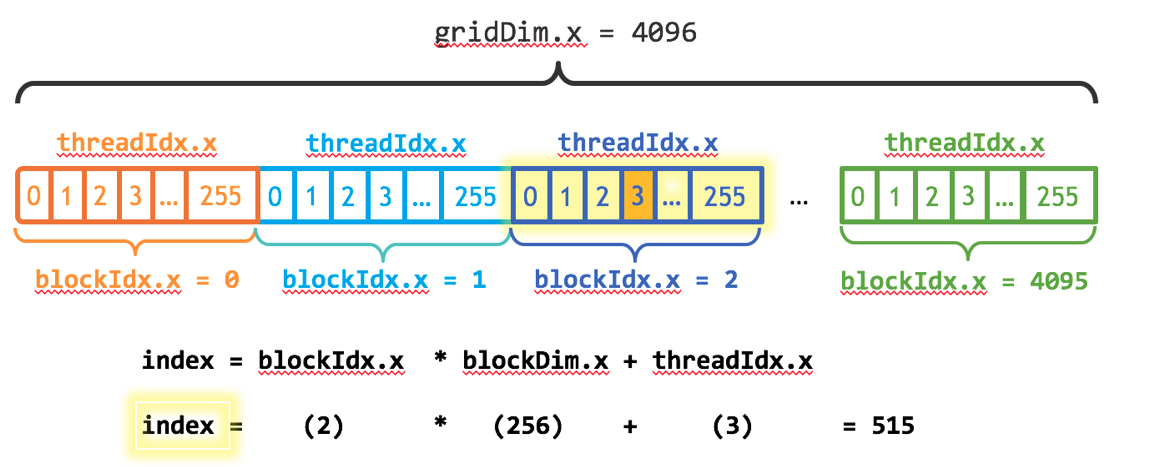

Update the kernel code to take into account the entire grid of thread blocks. CUDA provides gridDim.x, which contains the number of blocks in the grid, and blockIdx.x, which contains the index of the current thread block in the grid. Figure 1 illustrates the the approach to indexing into an array (one-dimensional) in CUDA using blockDim.x, gridDim.x, and threadIdx.x. The idea is that each thread gets its index by computing the offset to the beginning of its block (the block index times the block size: blockIdx.x * blockDim.x) and adding the thread’s index within the block (threadIdx.x). The code blockIdx.x * blockDim.x + threadIdx.x is idiomatic CUDA.

Compilamos el archivo suma5.cu

In [ ]:
!/usr/local/cuda/bin/nvcc -arch=sm_37 -rdc=true suma5.cu -o suma5 -lcudadevrt

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).


In [ ]:
!ls

sample_data  suma4  suma4.cu  suma5  suma5.cu


Corremos el fichero ejecutable

In [ ]:
!./suma5

Tiempo del cálculo suma 5 : 1.496000 ms
Tiempo con el synchronize  : 1.610000 ms
Suma de 1048576 elementos
Número de errores: 0
Max error: 0


Hacemos el profile de ejecución

In [ ]:
!nvprof ./suma5

==255== NVPROF is profiling process 255, command: ./suma5
==255== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
Tiempo del cálculo suma 5 : 1.501000 ms
Tiempo con el synchronize  : 1.608000 ms
Suma de 1048576 elementos
Número de errores: 0
Max error: 0
==255== Profiling application: ./suma5
==255== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:  100.00%  94.111us         1  94.111us  94.111us  94.111us  add(int, float*, float*)
      API calls:   98.38%  217.91ms         2  108.96ms  830.30us  217.08ms  cudaMallocManaged
                    0.67%  1.4891ms         1  1.4891ms  1.4891ms  1.4891ms  cudaLaunchKernel
                    0.51%  1.1317ms         2  565.84us  499.61us  632.08us  cudaFree
                    0.27%  593.48us         1  593.48us  593.48us  593.48us  cuDeviceTotalMem
                    0.11%  249.21us       101  2.4670us     140ns  145.12us  cuDeviceGetAttribu

##P8 Compare con el tiempo de ejecución con el resto de ejemplos anteriores.

Con esta nueva implementación de la función kernel, y con la utilización de un nº de bloques que sea divisible entre el nº de hilos por bloque usados, finalmente logramos mejorar el tiempo de ejecución de CPU (3.968000 ms) hasta los 1.608000 ms, demostrando que para este tipo de problemas (operaciones simples que se repiten de forma iterativa, es decir, que sean paralelizables) este tipo de implementaciones funciona relativamente bien.

###¿Que puede deducir de estos comportamientos?

De esto podemos concluir que los ejemplos anteriores no se estaba utilizando el paralelismo de una forma inteligente, ya que bien no estabamos utilizando funciones kernel bien paralelizadas, no estabamos sincronizando la memoria de forma correcta(o de forma muy lenta) o no estabamos usando una buena configuración de nº bloques/hilos por bloques adecuada para el problema.

## P9 Pruebe el último ejercicio con más threads por bloque

In [ ]:
%%writefile suma6.cu

#include <iostream>
#include <math.h>
#include <time.h>
#include <sys/time.h>

__global__
void add(int n, float *x, float *y)
{
  int index = blockIdx.x * blockDim.x + threadIdx.x;
  int stride = blockDim.x * gridDim.x;
  for (int i = index; i < n; i += stride)
    y[i] = x[i] + y[i];
}

int main(void) {
    
    int N = 1 <<20;  // N = 2^20 = 1024*1024= 1.048.576
    struct timeval tv;
	  unsigned long long start;
    float *x; // = new float[N];
    float *y; // = new float[N]; 

  // Allocate Unified Memory -- accessible from CPU or GPU
    cudaMallocManaged(&x, N*sizeof(float));
    cudaMallocManaged(&y, N*sizeof(float));
    
    for (int i =0; i < N; i++ ){
        x[i]= 1.0f;
        y[i]= 2.0f;
    }

    int k = 2;
    int blockSize = 256 * k;
    int numBlocks = (N + blockSize - 1) / blockSize;
    
    gettimeofday(&tv, NULL); 
    start=tv.tv_sec*1000000+tv.tv_usec;
   
   add<<<numBlocks, blockSize>>>(N, x, y);
  
    gettimeofday(&tv, NULL); 
	  printf("Tiempo del cálculo suma 5 : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);
  
   cudaDeviceSynchronize();
    gettimeofday(&tv, NULL); 
	  printf("Tiempo con el synchronize  : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);

   float maxError = 0.0f;
   int contError = 0;
   
   for (int i=0; i <N; i++){
       maxError=fmax(maxError,fabs(y[i]-3.0f));
       if (y[i] != 3.0) contError++; 
   }
   std::cout << "Suma de " << N << " elementos" << std::endl;
   std::cout << "Número de errores: " <<contError << std::endl;
   std::cout << "Max error: " <<maxError << std::endl;
  
 
  // Free memory
   cudaFree (x);
   cudaFree (y);
   
   return 0;
}

Writing suma6.cu


In [ ]:
!/usr/local/cuda/bin/nvcc -arch=sm_37 -rdc=true suma6.cu -o suma6 -lcudadevrt

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).


In [ ]:
!ls

sample_data  stenciltest  stenciltest.cu  suma6  suma6.cu


Corremos el fichero ejecutable

In [ ]:
!./suma6

Tiempo del cálculo suma 5 : 1.426000 ms
Tiempo con el synchronize  : 1.549000 ms
Suma de 1048576 elementos
Número de errores: 0
Max error: 0


In [ ]:
!./suma6

Tiempo del cálculo suma 5 : 1.421000 ms
Tiempo con el synchronize  : 1.542000 ms
Suma de 1048576 elementos
Número de errores: 0
Max error: 0


In [ ]:
!./suma6

Tiempo del cálculo suma 5 : 1.392000 ms
Tiempo con el synchronize  : 1.513000 ms
Suma de 1048576 elementos
Número de errores: 0
Max error: 0


Hacemos el profile de ejecución

In [ ]:
!nvprof ./suma6

==953== NVPROF is profiling process 953, command: ./suma6
==953== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
Tiempo del cálculo suma 5 : 1.632000 ms
Tiempo con el synchronize  : 1.747000 ms
Suma de 1048576 elementos
Número de errores: 0
Max error: 0
==953== Profiling application: ./suma6
==953== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:  100.00%  101.09us         1  101.09us  101.09us  101.09us  add(int, float*, float*)
      API calls:   98.40%  221.80ms         2  110.90ms  794.86us  221.01ms  cudaMallocManaged
                    0.72%  1.6257ms         1  1.6257ms  1.6257ms  1.6257ms  cudaLaunchKernel
                    0.47%  1.0590ms         2  529.49us  448.29us  610.69us  cudaFree
                    0.26%  574.89us         1  574.89us  574.89us  574.89us  cuDeviceTotalMem
                    0.09%  200.98us       101  1.9890us     163ns  80.471us  cuDeviceGetAttribu

Vemos una ligera mejora ya que tarda en torno a 1.5ms, pero no es una mejora líneal ya que hemos duplicado el número de hilos usado por bloque, por lo que continuamos aumentando para ver su evolución.

In [ ]:
%%writefile suma6.cu

#include <iostream>
#include <math.h>
#include <time.h>
#include <sys/time.h>

__global__
void add(int n, float *x, float *y)
{
  int index = blockIdx.x * blockDim.x + threadIdx.x;
  int stride = blockDim.x * gridDim.x;
  for (int i = index; i < n; i += stride)
    y[i] = x[i] + y[i];
}

int main(void) {
    
    int N = 1 <<20;  // N = 2^20 = 1024*1024= 1.048.576
    struct timeval tv;
	  unsigned long long start;
    float *x; // = new float[N];
    float *y; // = new float[N]; 

  // Allocate Unified Memory -- accessible from CPU or GPU
    cudaMallocManaged(&x, N*sizeof(float));
    cudaMallocManaged(&y, N*sizeof(float));
    
    for (int i =0; i < N; i++ ){
        x[i]= 1.0f;
        y[i]= 2.0f;
    }

    int blockSize = 1024;
    int numBlocks = (N + blockSize - 1) / blockSize;
    
    gettimeofday(&tv, NULL); 
    start=tv.tv_sec*1000000+tv.tv_usec;
   
   add<<<numBlocks, blockSize>>>(N, x, y);
  
    gettimeofday(&tv, NULL); 
	  printf("Tiempo del cálculo suma 5 : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);
  
   cudaDeviceSynchronize();
    gettimeofday(&tv, NULL); 
	  printf("Tiempo con el synchronize  : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);

   float maxError = 0.0f;
   int contError = 0;
   
   for (int i=0; i <N; i++){
       maxError=fmax(maxError,fabs(y[i]-3.0f));
       if (y[i] != 3.0) contError++; 
   }
   std::cout << "Suma de " << N << " elementos" << std::endl;
   std::cout << "Número de errores: " <<contError << std::endl;
   std::cout << "Max error: " <<maxError << std::endl;
  
 
  // Free memory
   cudaFree (x);
   cudaFree (y);
   
   return 0;
}

Overwriting suma6.cu


In [ ]:
!/usr/local/cuda/bin/nvcc -arch=sm_37 -rdc=true suma6.cu -o suma6 -lcudadevrt

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).


In [ ]:
!ls

sample_data  stenciltest  stenciltest.cu  suma6  suma6.cu


Corremos el fichero ejecutable

In [ ]:
!./suma6

Tiempo del cálculo suma 5 : 1.392000 ms
Tiempo con el synchronize  : 1.515000 ms
Suma de 1048576 elementos
Número de errores: 0
Max error: 0


In [ ]:
!./suma6

Tiempo del cálculo suma 5 : 1.459000 ms
Tiempo con el synchronize  : 1.582000 ms
Suma de 1048576 elementos
Número de errores: 0
Max error: 0


In [ ]:
!./suma6

Tiempo del cálculo suma 5 : 1.514000 ms
Tiempo con el synchronize  : 1.637000 ms
Suma de 1048576 elementos
Número de errores: 0
Max error: 0


Hacemos el profile de ejecución

In [ ]:
!nvprof ./suma6

==862== NVPROF is profiling process 862, command: ./suma6
==862== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
Tiempo del cálculo suma 5 : 1.492000 ms
Tiempo con el synchronize  : 1.613000 ms
Suma de 1048576 elementos
Número de errores: 0
Max error: 0
==862== Profiling application: ./suma6
==862== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:  100.00%  107.90us         1  107.90us  107.90us  107.90us  add(int, float*, float*)
      API calls:   98.74%  281.46ms         2  140.73ms  781.78us  280.68ms  cudaMallocManaged
                    0.52%  1.4782ms         1  1.4782ms  1.4782ms  1.4782ms  cudaLaunchKernel
                    0.39%  1.1199ms         2  559.97us  504.08us  615.86us  cudaFree
                    0.20%  579.01us         1  579.01us  579.01us  579.01us  cuDeviceTotalMem
                    0.10%  292.29us       101  2.8930us     238ns  125.79us  cuDeviceGetAttribu

Da la sensación de que se produce algún tipo de saturación, es decir que añadir más hilos por bloque produce una mejora pirrica o simplemente no aporta ninguna mejora, siendo un desperdicio de recursos. Esta saturación se debe a que comparten el mismo procesador, y por lo tanto, comparten recursos limitados de memoria.

Además de esto, tenemos que recordar que las GPUs actuales tienen un limite físico del nº de hilos que pueden llegar a alojar, siendo de 1024 actualmente, por lo que no tienen sentido seguir aumentando el número de hilos por bloque.

## P10 Pruebe el último ejercicio variando N para tamaños que no sean múltiplos del número de threads por bloque que se esté usando.

In [ ]:
%%writefile suma6.cu

#include <iostream>
#include <math.h>
#include <time.h>
#include <sys/time.h>

__global__
void add(int n, float *x, float *y)
{
  int index = blockIdx.x * blockDim.x + threadIdx.x;
  int stride = blockDim.x * gridDim.x;
  for (int i = index; i < n; i += stride)
    y[i] = x[i] + y[i];
}

int main(void) {
    
    int N = 1 <<20;  // N = 2^20 = 1024*1024= 1.048.576
    struct timeval tv;
	  unsigned long long start;
    float *x; // = new float[N];
    float *y; // = new float[N]; 

  // Allocate Unified Memory -- accessible from CPU or GPU
    cudaMallocManaged(&x, N*sizeof(float));
    cudaMallocManaged(&y, N*sizeof(float));
    
    for (int i =0; i < N; i++ ){
        x[i]= 1.0f;
        y[i]= 2.0f;
    }

    int k = 2;
    int blockSize = 256*k;
    int numBlocks = (N + blockSize - 1) / (blockSize + 11);
    
    gettimeofday(&tv, NULL); 
    start=tv.tv_sec*1000000+tv.tv_usec;
   
   add<<<numBlocks, blockSize>>>(N, x, y);
  
    gettimeofday(&tv, NULL); 
	  printf("Tiempo del cálculo suma 5 : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);
  
   cudaDeviceSynchronize();
    gettimeofday(&tv, NULL); 
	  printf("Tiempo con el synchronize  : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);

   float maxError = 0.0f;
   int contError = 0;
   
   for (int i=0; i <N; i++){
       maxError=fmax(maxError,fabs(y[i]-3.0f));
       if (y[i] != 3.0) contError++; 
   }
   std::cout << "Suma de " << N << " elementos" << std::endl;
   std::cout << "Número de errores: " <<contError << std::endl;
   std::cout << "Max error: " <<maxError << std::endl;
  
 
  // Free memory
   cudaFree (x);
   cudaFree (y);
   
   return 0;
}

Overwriting suma6.cu


In [ ]:
!/usr/local/cuda/bin/nvcc -arch=sm_37 -rdc=true suma6.cu -o suma6 -lcudadevrt

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).


In [ ]:
!ls

sample_data  stenciltest  stenciltest.cu  suma6  suma6.cu


Corremos el fichero ejecutable

In [ ]:
!./suma6

Tiempo del cálculo suma 5 : 1.506000 ms
Tiempo con el synchronize  : 1.635000 ms
Suma de 1048576 elementos
Número de errores: 0
Max error: 0


In [ ]:
!./suma6

Tiempo del cálculo suma 5 : 1.394000 ms
Tiempo con el synchronize  : 1.515000 ms
Suma de 1048576 elementos
Número de errores: 0
Max error: 0


In [ ]:
!./suma6

Tiempo del cálculo suma 5 : 2.336000 ms
Tiempo con el synchronize  : 2.459000 ms
Suma de 1048576 elementos
Número de errores: 0
Max error: 0


Hacemos el profile de ejecución

In [ ]:
!nvprof ./suma6

==993== NVPROF is profiling process 993, command: ./suma6
==993== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
Tiempo del cálculo suma 5 : 1.536000 ms
Tiempo con el synchronize  : 1.653000 ms
Suma de 1048576 elementos
Número de errores: 0
Max error: 0
==993== Profiling application: ./suma6
==993== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:  100.00%  102.98us         1  102.98us  102.98us  102.98us  add(int, float*, float*)
      API calls:   98.41%  215.44ms         2  107.72ms  805.98us  214.63ms  cudaMallocManaged
                    0.70%  1.5230ms         1  1.5230ms  1.5230ms  1.5230ms  cudaLaunchKernel
                    0.50%  1.0847ms         2  542.36us  473.45us  611.26us  cudaFree
                    0.24%  529.84us         1  529.84us  529.84us  529.84us  cuDeviceTotalMem
                    0.09%  197.60us       101  1.9560us     161ns  85.906us  cuDeviceGetAttribu

Como podemos ver obtenemos unos tiempos de ejecución peores en comparación con los apartados anteriores, de aquí concluimos que la causa de esto se debe a que cambiar el número de bloques de forma arbitraria, no beneficia al Coalescing, que requiere que nuestro número de bloques sea divisible entre el número de hilos por bloque, haciendo que el resultado de aumentar/disminuir el número de bloques sea contraproducente. 

##P11 Suma de dos matrices

Para hacer este código nos basamos en el tutorial de CUDA https://docs.nvidia.com/cuda/cuda-c-programming-guide/ en el cual nos da cierta  intuiciones de como elaborar el la función de Kernel y la función de sincronización.

En este caso, la guía nos recomienda la utilización de una función kernel que utilice tres argumentos, dos matrices A y B que serán las matrices a sumar y una tercera matriz C que será en la que almacenaremos los resultados.

Se intento reducir la función de la usma de matrices a solo dos parametros(guradan el resultado de la suma en uno de los operandos), pero esto como era de esperar, resulto en problemas de paralelismo. Por lo que siguiendo la recomendación del tutorial citado, decidimos utilizar esta función kernel que reciba tres matrices por parámetro.

Esta implementación esta limitada a que el número de bloques sea de 1 y en 1024 hilos por bloques.

In [ ]:
%%writefile suma7.cu
#include <stdio.h>
#include <stdlib.h>
#include <iostream>
#include <math.h>
#include <time.h>
#include <sys/time.h>

#define N 32

__global__ void MatAdd(int A[N][N], int B[N][N], int C[N][N]){
  //int i = threadIdx.x;
  //int j = threadIdx.y;
  int i = blockIdx.x * blockDim.x + threadIdx.x;
  int j = blockIdx.y * blockDim.y + threadIdx.y;
  
  C[i][j] = A[i][j] + B[i][j];
}

int main(){

  int A[N][N];
  int B[N][N];
  int C[N][N];

  struct timeval tv;
	unsigned long long start;

  for (int i=0; i<N; i++){
    for (int j=0; j<N; j++){
      A[i][j] = 1.0;
      B[i][j] = 2.0;
    }
  }    

  int (*pA)[N], (*pB)[N], (*pC)[N];

  //reservamos memoria compartida, lo hacemos a traves de void**(comodin) 
  //porque c++, no admite float** 
  cudaMalloc((void**)&pA, (N*N)*sizeof(int));
  cudaMalloc((void**)&pB, (N*N)*sizeof(int));
  cudaMalloc((void**)&pC, (N*N)*sizeof(int));

  cudaMemcpy(pA, A, (N*N)*sizeof(int), cudaMemcpyHostToDevice);
  cudaMemcpy(pB, B, (N*N)*sizeof(int), cudaMemcpyHostToDevice);
  cudaMemcpy(pC, C, (N*N)*sizeof(int), cudaMemcpyHostToDevice);

  // Kernel invocation with one block of N * N * 1 threads
  int numBlocks = 1;
  dim3 threadsPerBlock(N, N);

  gettimeofday(&tv, NULL); 
  start=tv.tv_sec*1000000+tv.tv_usec;

  MatAdd<<<numBlocks,threadsPerBlock>>>(pA,pB,pC); //1 bloques y 1024 hilos

  gettimeofday(&tv, NULL); 
	printf("Tiempo del cálculo suma de matrices : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);
  
  cudaMemcpy(C, pC, (N*N)*sizeof(int), cudaMemcpyDeviceToHost);
  
  gettimeofday(&tv, NULL); 
	printf("Tiempo con el synchronize  : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);

  int contError = 0, maxError = 0;

  for (int i=0; i<N; i++){
    for (int j=0; j<N; j++){
        maxError=fmax(maxError,fabs(C[i][j]-3));
        if (C[i][j] != 3) contError++; 
    }
  }

  std::cout << "Suma de matrices cuadradas de " << N << " elementos" << std::endl;
  std::cout << "Número de errores: " <<contError << std::endl;
  std::cout << "Max error: " <<maxError << std::endl;
  
  // Free memory
  cudaFree (pA);
  cudaFree (pB);
  cudaFree (pC);
}

Overwriting suma7.cu


In [ ]:
!/usr/local/cuda/bin/nvcc -arch=sm_37 -rdc=true suma7.cu -o suma7 -lcudadevrt

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).


In [ ]:
!ls

sample_data  suma7  suma7.cu


Corremos el fichero ejecutable

In [ ]:
!./suma7

Tiempo del cálculo suma de matrices : 0.026000 ms
Tiempo con el synchronize  : 0.092000 ms
Suma de matrices cuadradas de 32 elementos
Número de errores: 0
Max error: 0


In [ ]:
!nvprof ./suma7

==465== NVPROF is profiling process 465, command: ./suma7
==465== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
Tiempo del cálculo suma de matrices : 0.026000 ms
Tiempo con el synchronize  : 0.078000 ms
Suma de matrices cuadradas de 32 elementos
Número de errores: 0
Max error: 0
==465== Profiling application: ./suma7
==465== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   54.83%  12.704us         1  12.704us  12.704us  12.704us  MatAdd(int[32]*, int[32]*, int[32]*)
                   32.73%  7.5840us         3  2.5280us  2.4000us  2.7520us  [CUDA memcpy HtoD]
                   12.43%  2.8800us         1  2.8800us  2.8800us  2.8800us  [CUDA memcpy DtoH]
      API calls:   99.52%  197.30ms         3  65.765ms  2.0670us  197.29ms  cudaMalloc
                    0.25%  496.36us         1  496.36us  496.36us  496.36us  cuDeviceTotalMem
                    0.09%  184.46us       101  1.82

El problema de esta solución es su escasa escabilidad, ya que solo admite un tamaño de N máximo de 32, un único bloque y 1024 hilos. Tratamos de modificar el código para mejorar esta escabilidad.

Para ello comenzamos cambiando la función kernel, de tal forma que ahora solo pasamos vectores por argumento en vez de matrices, esto nos obligará a la hora de calcular la suma calcular el indice de la posición a sumar.

int index = col + row * N;

Con esta modificación y la utilización del número de bloques, hilos y la función cudaDeviceSynchronize logramos aumentar el paralelismo y el tamaño de matrices cuadradas a sumar, en este caso hemos decidido probar con un tamaño de 128.



In [ ]:
%%writefile suma7.cu
#include <stdio.h>
#include <stdlib.h>
#include <iostream>
#include <math.h>
#include <time.h>
#include <sys/time.h>

#define N 128
#define BLOCK_DIM 32

__global__ 
void matrixAdd (int *A, int *B, int *C) {
    int col = blockIdx.x * blockDim.x + threadIdx.x;
    int row = blockIdx.y * blockDim.y + threadIdx.y;

    int index = col + row * N;

    if (col < N && row < N) {
        C[index] = A[index] + B[index];
    }
}

int main() {
    int A[N][N], B[N][N], C[N][N];
    int *pA, *pB, *pC;

    struct timeval tv;
	  unsigned long long start;

    int size = N * N * sizeof(int);

    for(int i=0; i<N; i++){
        for (int j=0; j<N; j++){
            A[i][j] = 1;
            B[i][j] = 2;
        }
    }

    cudaMalloc((void**)&pA, size);
    cudaMalloc((void**)&pB, size);
    cudaMalloc((void**)&pC, size);

    cudaMemcpy(pA, A, size, cudaMemcpyHostToDevice);
    cudaMemcpy(pB, B, size, cudaMemcpyHostToDevice);

    dim3 dimBlock(BLOCK_DIM, BLOCK_DIM);
    dim3 dimGrid((N+dimBlock.x-1)/dimBlock.x, (N+dimBlock.y-1)/dimBlock.y);

    gettimeofday(&tv, NULL); 
    start=tv.tv_sec*1000000+tv.tv_usec;

    matrixAdd<<<dimGrid,dimBlock>>>(pA,pB,pC);
    
    gettimeofday(&tv, NULL); 
	  printf("Tiempo del cálculo suma de matrices : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);

    cudaDeviceSynchronize();
    cudaMemcpy(C, pC, size, cudaMemcpyDeviceToHost);

    gettimeofday(&tv, NULL); 
	  printf("Tiempo con el synchronize  : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);
    
    int contError = 0, maxError = 0;

    for (int i=0; i<N; i++){
      for (int j=0; j<N; j++){
          maxError=fmax(maxError,fabs(C[i][j]-3));
          if (C[i][j] != 3) contError++; 
      }
    }

    std::cout << "Suma de matrices cuadradas de " << N << " elementos" << std::endl;
    std::cout << "Número de errores: " <<contError << std::endl;
    std::cout << "Max error: " <<maxError << std::endl;

    cudaFree(pA);
    cudaFree(pB);
    cudaFree(pC);
}


Overwriting suma7.cu


In [ ]:
!/usr/local/cuda/bin/nvcc -arch=sm_37 -rdc=true suma7.cu -o suma7 -lcudadevrt

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).


In [ ]:
!ls

sample_data  suma7  suma7.cu


Corremos el fichero ejecutable

In [ ]:
!./suma7

Tiempo del cálculo suma de matrices : 0.055000 ms
Tiempo con el synchronize  : 0.199000 ms
Suma de matrices cuadradas de 128 elementos
Número de errores: 0
Max error: 0


In [ ]:
!nvprof ./suma7

==761== NVPROF is profiling process 761, command: ./suma7
==761== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
Tiempo del cálculo suma de matrices : 0.028000 ms
Tiempo con el synchronize  : 0.135000 ms
Suma de matrices cuadradas de 128 elementos
Número de errores: 0
Max error: 0
==761== Profiling application: ./suma7
==761== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   68.29%  32.384us         2  16.192us  16.096us  16.288us  [CUDA memcpy HtoD]
                   23.01%  10.912us         1  10.912us  10.912us  10.912us  [CUDA memcpy DtoH]
                    8.70%  4.1280us         1  4.1280us  4.1280us  4.1280us  matrixAdd(int*, int*, int*)
      API calls:   99.47%  214.21ms         3  71.405ms  3.6440us  214.20ms  cudaMalloc
                    0.23%  503.54us         1  503.54us  503.54us  503.54us  cuDeviceTotalMem
                    0.12%  250.17us       101  2.4760us    

##P12 Stencil1D

Compile el siguiente código, explique su funcionamiento y compruebe si la salida es correcta. En caso de que sea necesario realice las modificaciones oportunas.

## P12.2 Stencil sin memoria compartida

Editamos el código para que no se haga uso de la memoria compartida

In [ ]:
%%writefile stenciltest_nosharedmem.cu

#include <stdio.h>
#include <time.h>
#include <sys/time.h>

#define RADIUS        3
#define BLOCK_SIZE    256
#define NUM_ELEMENTS  (4096*2)

// CUDA API error checking macro
#define cudaCheck(error) \
  if (error != cudaSuccess) { \
    printf("Fatal error: %s at %s:%d\n", \
      cudaGetErrorString(error), \
      __FILE__, __LINE__); \
    exit(1); \
  }

__global__ void stencil_1d(int *in, int *out) 
{
    //__shared__ int temp[BLOCK_SIZE + 2 * RADIUS];
    int lindex = threadIdx.x + RADIUS;

  
    // Apply the stencil
    int result = 0;
    for (int offset = -RADIUS ; offset <= RADIUS ; offset++)
        result += in[lindex + offset];

    // Store the result
    out[lindex-RADIUS] = result;
}

int main()
{
  unsigned int i;
  int h_in[NUM_ELEMENTS + 2 * RADIUS], h_out[NUM_ELEMENTS];
  int *d_in, *d_out;
  struct timeval tv;
	unsigned long long start;

  // Initialize host data
  for( i = 0; i < (NUM_ELEMENTS + 2*RADIUS); ++i )
    h_in[i] = 1; // With a value of 1 and RADIUS of 3, all output values should be 7

  // Allocate space on the device
  cudaCheck( cudaMalloc( &d_in, (NUM_ELEMENTS + 2*RADIUS) * sizeof(int)) );
  cudaCheck( cudaMalloc( &d_out, NUM_ELEMENTS * sizeof(int)) );

  // Copy input data to device
  cudaCheck( cudaMemcpy( d_in, h_in, (NUM_ELEMENTS + 2*RADIUS) * sizeof(int), cudaMemcpyHostToDevice) );


  gettimeofday(&tv, NULL); 
  start=tv.tv_sec*1000000+tv.tv_usec;
   
  stencil_1d<<< (NUM_ELEMENTS + BLOCK_SIZE - 1)/BLOCK_SIZE, BLOCK_SIZE >>> (d_in, d_out);

  gettimeofday(&tv, NULL); 
	printf("Tiempo del kernel stencil 1d: %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);

  cudaCheck( cudaMemcpy( h_out, d_out, NUM_ELEMENTS * sizeof(int), cudaMemcpyDeviceToHost) );

  // Verify every out value is 7
  for( i = 0; i < NUM_ELEMENTS; ++i )
    if (h_out[i] != 7)
    {
      printf("Element h_out[%d] == %d != 7\n", i, h_out[i]);
      break;
    }

  if (i == NUM_ELEMENTS)
    printf("SUCCESS!\n");

  // Free out memory
  cudaFree(d_in);
  cudaFree(d_out);

  return 0;
}


Overwriting stenciltest_nosharedmem.cu


In [ ]:
!/usr/local/cuda/bin/nvcc -arch=sm_35 -rdc=true stenciltest_nosharedmem.cu -o ./stenciltest_nosharedmem -lcudadevrt
!./stenciltest_nosharedmem

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
Tiempo del kernel stencil 1d: 0.031000 ms
Element h_out[256] == 0 != 7


In [ ]:
!nvprof ./stenciltest_nosharedmem

==1523== NVPROF is profiling process 1523, command: ./stenciltest_nosharedmem
==1523== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
Element h_out[256] == 0 != 7
==1523== Profiling application: ./stenciltest_nosharedmem
==1523== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   43.25%  9.0230us         1  9.0230us  9.0230us  9.0230us  [CUDA memcpy HtoD]
                   33.44%  6.9760us         1  6.9760us  6.9760us  6.9760us  [CUDA memcpy DtoH]
                   23.31%  4.8640us         1  4.8640us  4.8640us  4.8640us  stencil_1d(int*, int*)
      API calls:   99.48%  203.51ms         2  101.75ms  4.7560us  203.50ms  cudaMalloc
                    0.25%  510.93us         1  510.93us  510.93us  510.93us  cuDeviceTotalMem
                    0.11%  223.68us       101  2.2140us     171ns  82.601us  cuDeviceGetAttribute
                    0.08%  162.23us         2  81.117us  13.047us

Observamos como entorno al 80% del tiempo se emplea copiando los datos de la memoria del CPU a la del GPU y viceversa. Esto es porque por cada elemento estamos accediendo a la memoria global 7 veces para poder leerlo.

Es decir, que al cáculo de la operación solo se le dedica un 20% del tiempo total. Lo cual es bastante ineficiente. Además dado que hay carrera de datos obtenemos resultado erróneos.


## P12.2 Stencil sin _synthreads() y con memoria compartida
Ejecutamos el código orginal dado



In [ ]:
%%writefile stenciltest.cu

#include <stdio.h>
#include <time.h>
#include <sys/time.h>

#define RADIUS        3
#define BLOCK_SIZE    256
#define NUM_ELEMENTS  (4096*2)

// CUDA API error checking macro
#define cudaCheck(error) \
  if (error != cudaSuccess) { \
    printf("Fatal error: %s at %s:%d\n", \
      cudaGetErrorString(error), \
      __FILE__, __LINE__); \
    exit(1); \
  }

__global__ void stencil_1d(int *in, int *out) 
{
    __shared__ int temp[BLOCK_SIZE + 2 * RADIUS];
    int gindex = threadIdx.x + (blockIdx.x * blockDim.x) + RADIUS;
    int lindex = threadIdx.x + RADIUS;
    

    // Read input elements into shared memory
    temp[lindex] = in[gindex];
    if (threadIdx.x < RADIUS) 
    {
        temp[lindex - RADIUS] = in[gindex - RADIUS];
        temp[lindex + BLOCK_SIZE] = in[gindex + BLOCK_SIZE];
    }

    // Make sure all threads get to this point before proceeding!
    //__syncthreads();

    // Apply the stencil
    int result = 0;
    for (int offset = -RADIUS ; offset <= RADIUS ; offset++)
        result += temp[lindex + offset];

    // Store the result
    out[gindex-RADIUS] = result;
}

int main()
{
  unsigned int i;
  int h_in[NUM_ELEMENTS + 2 * RADIUS], h_out[NUM_ELEMENTS];
  int *d_in, *d_out;
  struct timeval tv;
	unsigned long long start;

  // Initialize host data
  for( i = 0; i < (NUM_ELEMENTS + 2*RADIUS); ++i )
    h_in[i] = 1; // With a value of 1 and RADIUS of 3, all output values should be 7

  // Allocate space on the device
  cudaCheck( cudaMalloc( &d_in, (NUM_ELEMENTS + 2*RADIUS) * sizeof(int)) );
  cudaCheck( cudaMalloc( &d_out, NUM_ELEMENTS * sizeof(int)) );

  // Copy input data to device
  cudaCheck( cudaMemcpy( d_in, h_in, (NUM_ELEMENTS + 2*RADIUS) * sizeof(int), cudaMemcpyHostToDevice) );


  gettimeofday(&tv, NULL); 
  start=tv.tv_sec*1000000+tv.tv_usec;
   
  stencil_1d<<< (NUM_ELEMENTS + BLOCK_SIZE - 1)/BLOCK_SIZE, BLOCK_SIZE >>> (d_in, d_out);

  gettimeofday(&tv, NULL); 
	printf("Tiempo del kernel stencil 1d: %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);

  cudaCheck( cudaMemcpy( h_out, d_out, NUM_ELEMENTS * sizeof(int), cudaMemcpyDeviceToHost) );

  // Verify every out value is 7
  for( i = 0; i < NUM_ELEMENTS; ++i )
    if (h_out[i] != 7)
    {
      printf("Element h_out[%d] == %d != 7\n", i, h_out[i]);
      break;
    }

  if (i == NUM_ELEMENTS)
    printf("SUCCESS!\n");

  // Free out memory
  cudaFree(d_in);
  cudaFree(d_out);

  return 0;
}


Overwriting stenciltest.cu


In [ ]:
!/usr/local/cuda/bin/nvcc -arch=sm_35 -rdc=true stenciltest.cu -o ./stenciltest -lcudadevrt
!./stenciltest

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
Tiempo del kernel stencil 1d: 0.013000 ms
Element h_out[0] == 22 != 7


In [ ]:
!nvprof ./stenciltest

==1218== NVPROF is profiling process 1218, command: ./stenciltest
==1218== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
SUCCESS!
==1218== Profiling application: ./stenciltest
==1218== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   57.07%  13.440us         1  13.440us  13.440us  13.440us  [CUDA memcpy HtoD]
                   28.67%  6.7520us         1  6.7520us  6.7520us  6.7520us  [CUDA memcpy DtoH]
                   14.27%  3.3600us         1  3.3600us  3.3600us  3.3600us  stencil_1d(int*, int*)
      API calls:   99.37%  194.38ms         2  97.189ms  4.8140us  194.37ms  cudaMalloc
                    0.32%  622.96us         1  622.96us  622.96us  622.96us  cuDeviceTotalMem
                    0.14%  282.67us       101  2.7980us     241ns  120.81us  cuDeviceGetAttribute
                    0.07%  130.97us         2  65.483us  12.598us  118.37us  cudaFree
                    0.0

Vemos como se reduce el tiempo de acceso a memoria debido a que ahora utilizamos memoria compartida entre los hilos del mismo bloque, lo que reduce el tiempo de cómputo. Hemos conseguido pasar de un tiempo de ejecución del kernel de 0.031000 ms ms a 0.013000 ms, todo ello mediante el uso de memoria compartida. Esto es debido a que mediante el uso de memoria compartida entre hilos del mismo bloque, no tenemos que cargar los datos desde memoria global repetidamente, lo cual es más costoso y se acaba traduciendo en un tiempo de ejecución mayor.

Para aprovechar aún mas esta aceleración necesitamos un mayor número de hilos, es decir, que la operacion a realizar sea más grande, para que podamos apreciar una aceleración más clara y ver el potencial de paralelización de la gráfica.


Además, vemos que no funciona, obtenemos errores. Vamos a realizar los cambios oportunos para que esto funcione. Hay que descomentar la línea __syncthreads() ya que si no se produce un Data Race. Esto es porque hay que esperar a que todos sus hilos copien su parte correspondiente de la entrada de la memoria global a la compartida. 

Si no se puede dar el caso de que, por ejemplo, el hilo "15" intente acceder a sus datos contíguos hasta el tamaño del radio(por ejemplo el 16), pero está leyendo datos aun no escritos en memoria compartida, ya que era el hilo "1" el que tenía que escribir esa parte del halo del input. Como el hilo "1" va más atrasado y tiene que ejecutar la condición de "if (threadIdx.x < RADIUS)" para copiar su parte del halo, el hilo 15 estaría leyendo un dato  de la memoria compartida(el 16) antes de que éste fuera escrito, es decir, que hay carrera de datos. 
Para solucionarlo hacemos un __syncthreads(), para que todos los hilos escriban su parte correspondiente en  la memoria compartida , antes de empezar a operar.

## P12.3 Stencil con _synthreads() y con memoria compartida


In [ ]:
%%writefile stenciltest_fix.cu

#include <stdio.h>
#include <time.h>
#include <sys/time.h>

#define RADIUS        3
#define BLOCK_SIZE    256
#define NUM_ELEMENTS  (4096*2)

// CUDA API error checking macro
#define cudaCheck(error) \
  if (error != cudaSuccess) { \
    printf("Fatal error: %s at %s:%d\n", \
      cudaGetErrorString(error), \
      __FILE__, __LINE__); \
    exit(1); \
  }

__global__ void stencil_1d(int *in, int *out) 
{
    __shared__ int temp[BLOCK_SIZE + 2 * RADIUS];
    int gindex = threadIdx.x + (blockIdx.x * blockDim.x) + RADIUS;
    int lindex = threadIdx.x + RADIUS;

    // Read input elements into shared memory
    temp[lindex] = in[gindex];
    if (threadIdx.x < RADIUS) 
    {
        temp[lindex - RADIUS] = in[gindex - RADIUS];
        temp[lindex + BLOCK_SIZE] = in[gindex + BLOCK_SIZE];
    }

    // Make sure all threads get to this point before proceeding!
    __syncthreads();

    // Apply the stencil
    int result = 0;
    for (int offset = -RADIUS ; offset <= RADIUS ; offset++)
        result += temp[lindex + offset];

    // Store the result
    out[gindex-RADIUS] = result;
}

int main()
{
  unsigned int i;
  int h_in[NUM_ELEMENTS + 2 * RADIUS], h_out[NUM_ELEMENTS];
  int *d_in, *d_out;
  struct timeval tv;
	unsigned long long start;

  // Initialize host data
  for( i = 0; i < (NUM_ELEMENTS + 2*RADIUS); ++i )
    h_in[i] = 1; // With a value of 1 and RADIUS of 3, all output values should be 7

  // Allocate space on the device
  cudaCheck( cudaMalloc( &d_in, (NUM_ELEMENTS + 2*RADIUS) * sizeof(int)) );
  cudaCheck( cudaMalloc( &d_out, NUM_ELEMENTS * sizeof(int)) );

  // Copy input data to device
  cudaCheck( cudaMemcpy( d_in, h_in, (NUM_ELEMENTS + 2*RADIUS) * sizeof(int), cudaMemcpyHostToDevice) );


  gettimeofday(&tv, NULL); 
  start=tv.tv_sec*1000000+tv.tv_usec;
   
  stencil_1d<<< (NUM_ELEMENTS + BLOCK_SIZE - 1)/BLOCK_SIZE, BLOCK_SIZE >>> (d_in, d_out);

  gettimeofday(&tv, NULL); 
	printf("Tiempo del kernel stencil 1d: %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);
 

  cudaCheck( cudaMemcpy( h_out, d_out, NUM_ELEMENTS * sizeof(int), cudaMemcpyDeviceToHost) );

  // Verify every out value is 7
  for( i = 0; i < NUM_ELEMENTS; ++i )
    if (h_out[i] != 7)
    {
      printf("Element h_out[%d] == %d != 7\n", i, h_out[i]);
      break;
    }

  if (i == NUM_ELEMENTS)
    printf("SUCCESS!\n");

  // Free out memory
  cudaFree(d_in);
  cudaFree(d_out);

  return 0;
}


Writing stenciltest_fix.cu


In [ ]:
!/usr/local/cuda/bin/nvcc -arch=sm_35 -rdc=true stenciltest_fix.cu -o ./stenciltest_fix -lcudadevrt
!./stenciltest_fix

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
Tiempo del kernel stencil 1d: 0.014000 ms
SUCCESS!


In [ ]:
!nvprof ./stenciltest

==1271== NVPROF is profiling process 1271, command: ./stenciltest
==1271== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
SUCCESS!
==1271== Profiling application: ./stenciltest
==1271== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   47.15%  8.9920us         1  8.9920us  8.9920us  8.9920us  [CUDA memcpy HtoD]
                   35.40%  6.7520us         1  6.7520us  6.7520us  6.7520us  [CUDA memcpy DtoH]
                   17.45%  3.3280us         1  3.3280us  3.3280us  3.3280us  stencil_1d(int*, int*)
      API calls:   99.52%  198.54ms         2  99.269ms  4.7560us  198.53ms  cudaMalloc
                    0.24%  486.78us         1  486.78us  486.78us  486.78us  cuDeviceTotalMem
                    0.09%  186.43us       101  1.8450us     160ns  67.986us  cuDeviceGetAttribute
                    0.07%  146.61us         2  73.303us  13.967us  132.64us  cudaFree
                    0.0

Ya no tenemos fallos de ejecución ya que hemos eliminado la carrera de datos con _syncthreads() para la memoria compartida utilizada en el kernel.

Observamos un tiempo:0.014ms similar al ejemplo anterior, ya que también utilizamos memoria compartida. Es de esperar que tal vez tardase unos tiempo despcreciable más en este ejemplo debido a que estamos haciendo un _synthreads(), el cual tiene que esperar a todos los hilos para evitar carreras de datos.  

#Partes 2: Computación cuántica

Comenzamos exportando las librerias de quskit para poder emular los circuitos cuánticos

In [ ]:
!pip3 install qiskit

     |████████████████████████████████| 6.1 MB 13.1 MB/s 
     |████████████████████████████████| 17.9 MB 120 kB/s 
     |████████████████████████████████| 236 kB 50.6 MB/s 
     |████████████████████████████████| 207 kB 49.5 MB/s 
     |████████████████████████████████| 2.1 MB 33.7 MB/s 
     |████████████████████████████████| 634 kB 25.2 MB/s 
     |████████████████████████████████| 1.4 MB 37.9 MB/s 
     |████████████████████████████████| 52 kB 1.4 MB/s 
     |████████████████████████████████| 38.2 MB 25 kB/s 
     |████████████████████████████████| 943 kB 41.0 MB/s 
     |████████████████████████████████| 49 kB 6.1 MB/s 
     |████████████████████████████████| 3.5 MB 46.2 MB/s 
     |████████████████████████████████| 6.3 MB 38.3 MB/s 
  Created wheel for qiskit: filename=qiskit-0.31.0-py3-none-any.whl size=11728 sha256=aa07d358b9b3abfdb81193ab49b902f22547828bbfbcb1a37509a909cf96dece
  Stored in directory: /root/.cache/pip/wheels/29/dd/b2/1fe1a9ac92aaf75b267d893ae27329ea229f292a2930

In [ ]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, assemble, Aer, execute
from qiskit.visualization import plot_histogram
from numpy import pi

## Puerta de Hadamard

Esta puerta opera sobre un único qubit. Esta puerta realiza la operación de asignar el estado base $|0\rangle$ a $\frac{|0\rangle + |1\rangle}{\sqrt {2}}(\equiv |+\rangle )$ y el estado base $|1\rangle$ a $\frac{|0\rangle + |1\rangle}{\sqrt {2}}(\equiv |-\rangle )$ siendo la base {$|+\rangle ,|-\rangle$} a llamada base de Hadamard, y representa una rotación de $\pi$ sobre el eje $\frac{(\hat x + \hat z)}{\sqrt {2}}$. 

Equivalentemente, es la combinación de dos rotaciones, una de $\pi$ sobre el eje $\hat z$ seguido de una rotación de $\pi /2$ sobre el eje $\hat y$ Se representa mediante la matriz de Hadamard:

$H={\frac {1}{\sqrt {2}}}\begin{bmatrix}1 & 1\\1 & -1\end{bmatrix}$

La puerta de Hadamard no es más que la representación de un qubit de la transformada cuántica de Fourier.

Como las filas de la matriz son ortogonales, $H$ es una matriz unitaria.

Pasamos a hacer una puerta H de un solo qubits y a ver su comportamiento, siendo el dibujo( y código) del circuito de la siguiente manera:

In [ ]:
qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.x(qreg_q[0])
circuit.h(qreg_q[0])

circuit.draw()

┌───┐┌───┐
q_0: ┤ X ├┤ H ├
     └───┘└───┘
c: 1/══════════

Probamos ahora a calcular la probabilidad de la salida, en este caso al medir el cubit hemos obtenido que este ha colpasado el valor de 0, por lo que tomará dicho estado con un 100% de probabilidad. 

/usr/local/lib/python3.7/dist-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


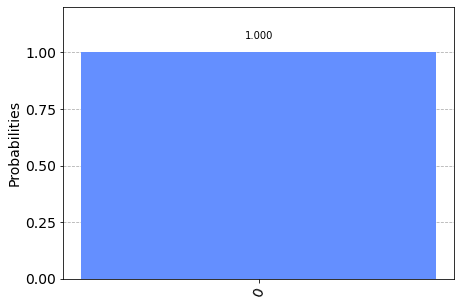

In [ ]:
sim = Aer.get_backend('aer_simulator') 
qobj = assemble(circuit)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

Ahora bien, cuando aplicamos varias simulaciones, podemos aplicar la ley de los grandes números. Lo cual termina por suavizar las probabilidades de todos los estados posibles (0 y 1 en este caso), tal como se puede apreciar en las probabilidades del IBM Quantum Composer.

Como era de esperar, se cumple la propia definición de la puerta, ya que el qubit tiene una probabilidad inicial del 50% de colapsar a uno y otro de los dos estados.

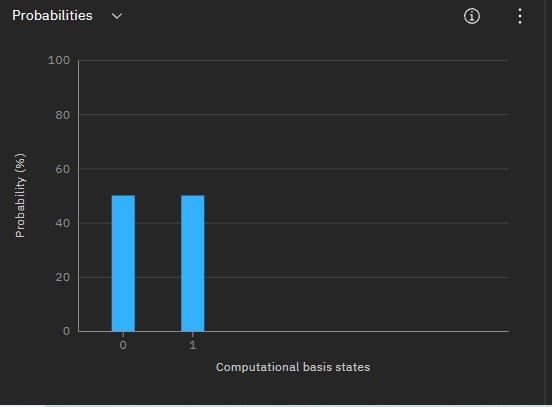

Probamos ahora a añadir un nuevo qubit con su puerta Hadamard correspondiente y simulamos el circuito.

In [ ]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.x(qreg_q[0])
circuit.x(qreg_q[1])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])

circuit.draw()

┌───┐┌───┐
q_0: ┤ X ├┤ H ├
     ├───┤├───┤
q_1: ┤ X ├┤ H ├
     └───┘└───┘
c: 2/══════════

En esta ocasión de la combinación de cuatro estados posibles (00, 01, 10, 11) colpasa al estado de 00 con un 100% de probabilidad(se ha despejado la incertidumbre).

/usr/local/lib/python3.7/dist-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


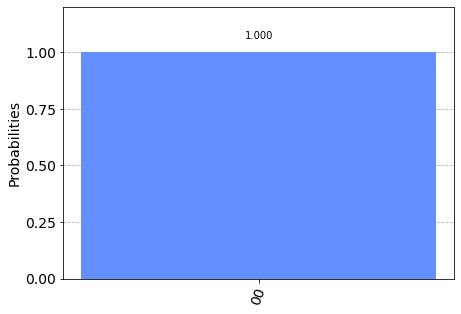

In [ ]:
sim = Aer.get_backend('aer_simulator') 
qobj = assemble(circuit)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

De nuevo si repitieramos la simulación, podríamos obtener el mismo u otro de los tres estados diferentes. Por lo que volviendo a aplicar un limite al infinio y con el terema de los grandes número terminariamos obteniendo la siguiende distribución de probabilidades.

De nuevo podemos ver que la distribución es uniforme entre los cuatro estados dados.

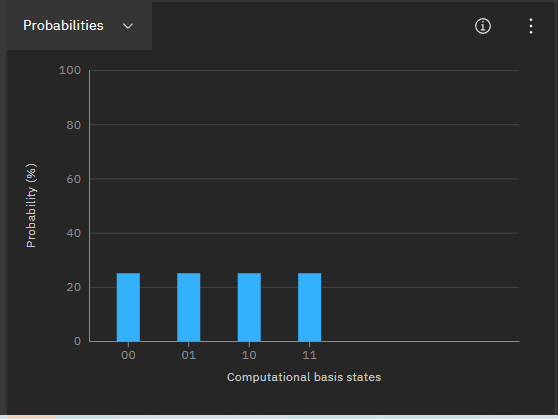

## Entrelazamiento

Es un fenómeno de la mecánica cuántica demostrable mediante experimentación en la cual un conjunto de partículas entrelazadas, no se pueden definir como partículas individuales con estados definidos independientes, sino como un sistema con una función de onda única para todo el sistema.  

Dicho de una forma más coloquial, el estado de un qubit entrelazado dependerá de su pareja y viceversa, por lo que si midierámos el estado de uno de ellos podríamos conocer el estado del otro sin problemas. El entrelacamiento entre dos qubits se puede emular en circuito cuántico con una puerta H en el primer qubit y una puerta CNOt entre el par de qubits(para entrelazar).

In [ ]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])

circuit.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
c: 2/══════════

Procedemos a realizar un medición y ver que ocurre, en este caso podemos ver claramente como ambos qubits al estar correlacionados han colapsado al mismo estado, para descartar que esto es una "casualidad", procedemos a emular multiples veces mediante IBM Quantum Composer.

/usr/local/lib/python3.7/dist-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


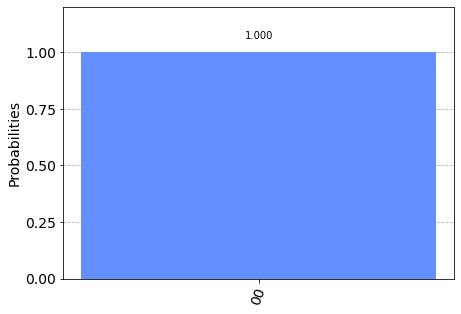

In [ ]:
sim = Aer.get_backend('aer_simulator') 
qobj = assemble(circuit)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

Tal como esperabamos, pese a que tenemos dos qubits y por lo tanto cuatro estados posibles, tal como vimos en el apartado anterior, en este caso solo obtenemos dos estados de los posibles debido a la correlación de los qubits. 

Demostrando así el funcionamiento del entrelazamiento, ya que cuando unos de los qubits mida un estado, con una probabilidad del 50%, el otro tomará ese mismo estado con una probabilidadl del 100% y de ahi que la probabilidades conjuntas de tomar uno u otro estado sean del 50%.

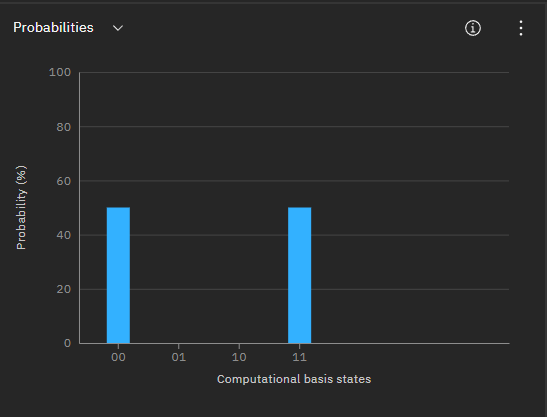

Pero este no es el código que nos pide exactamente en elenuciado, sino una pequeña modificación del circuito de entrelazamiento, ya que nuestro caso se ha añadido una puerta NOT al primer qubit.

Esto lo que provocará naturalmente es que el primer qubit tomará el estado opuesto al qubit con el que esta entrelazado, por lo qu ene vez de tomar los estado 00 y 11 respectivamente como en el caso anterior, tomaremos el estado 01 o 10 con una probabilidad del 50% en cada uno.

In [ ]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])              #H
circuit.cx(qreg_q[0], qreg_q[1])  #XOR
circuit.x(qreg_q[0])              #X

circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])

circuit.draw()

┌───┐     ┌───┐┌─┐
q_0: ┤ H ├──■──┤ X ├┤M├
     └───┘┌─┴─┐└┬─┬┘└╥┘
q_1: ─────┤ X ├─┤M├──╫─
          └───┘ └╥┘  ║ 
c: 2/════════════╩═══╩═
                 1   0

/usr/local/lib/python3.7/dist-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


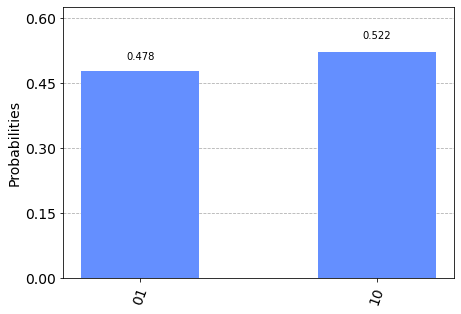

In [ ]:
sim = Aer.get_backend('aer_simulator') 
qobj = assemble(circuit)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

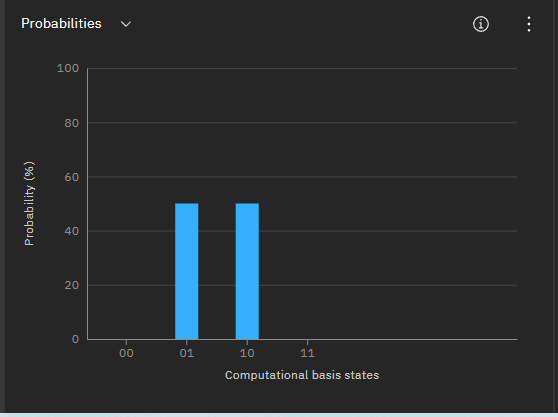

## Generación de números aleatorios (4bits)

Conociendo que las puertas H nos dan con una probabilidad del 50% con cada qubit un generador de números aleatorios sería tan simple como aplicar una puerta H sobre tantos qubits como terminos queramos que tenga el número, recordemos que generaremos números en una base binaria.

In [ ]:
qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.h(qreg_q[3])

circuit.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     ├───┤
q_3: ┤ H ├
     └───┘
c: 4/═════

/usr/local/lib/python3.7/dist-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


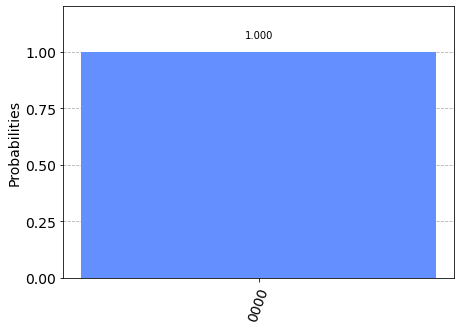

In [ ]:
sim = Aer.get_backend('aer_simulator') 
qobj = assemble(circuit)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

Como viene siendo habitual al realizar una única medición colpasaremos a uno de los números aleatorios de los 16 estados disponibles, si volvemos aplicar las leyes de los grandes números acabamos por obtener la siguiente distribución uniforme.

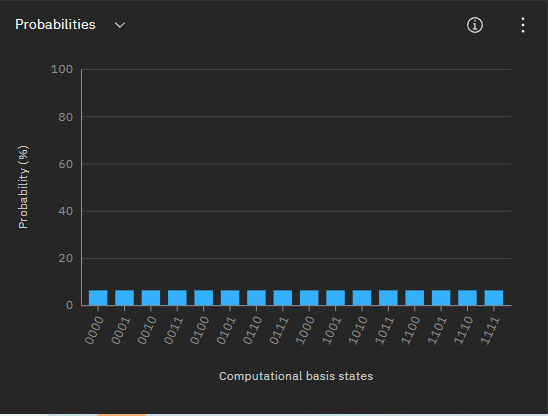

Este aún así no es el único circuito que hay para generar números aleatorios, ya que podríamos elaborar este segundo circuito basado en entrelazamiento y obtner un generador de números aleatorios.

In [ ]:
qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[3])
circuit.h(qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[3])
circuit.h(qreg_q[2])
circuit.cx(qreg_q[2], qreg_q[3])
circuit.h(qreg_q[3])
circuit.x(qreg_q[3])

circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])
circuit.measure(qreg_q[3], creg_c[3])

circuit.draw()

┌───┐          ┌─┐                        
q_0: ┤ H ├──■───────┤M├────────────────────────
     ├───┤  │       └╥┘     ┌─┐                
q_1: ┤ H ├──┼────■───╫──────┤M├────────────────
     ├───┤  │    │   ║      └╥┘     ┌─┐        
q_2: ┤ H ├──┼────┼───╫───■───╫──────┤M├────────
     └───┘┌─┴─┐┌─┴─┐ ║ ┌─┴─┐ ║ ┌───┐└╥┘┌───┐┌─┐
q_3: ─────┤ X ├┤ X ├─╫─┤ X ├─╫─┤ H ├─╫─┤ X ├┤M├
          └───┘└───┘ ║ └───┘ ║ └───┘ ║ └───┘└╥┘
c: 4/════════════════╩═══════╩═══════╩═══════╩═
                     0       1       2       3

/usr/local/lib/python3.7/dist-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


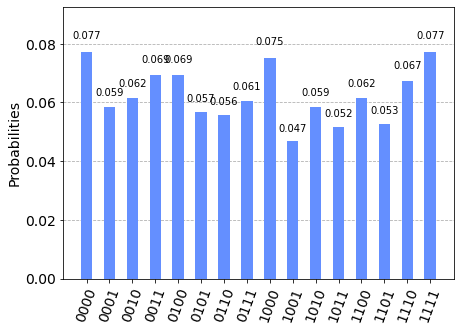

In [ ]:
sim = Aer.get_backend('aer_simulator') 
qobj = assemble(circuit)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

En este caso al colapasar no obtenemso una distribución uniforme(pseudoaleatoria) de los 16 estados disponibles, si volvemos aplicar las leyes de los grandes números acabamos por obtener la siguiente distribución uniforme.
 

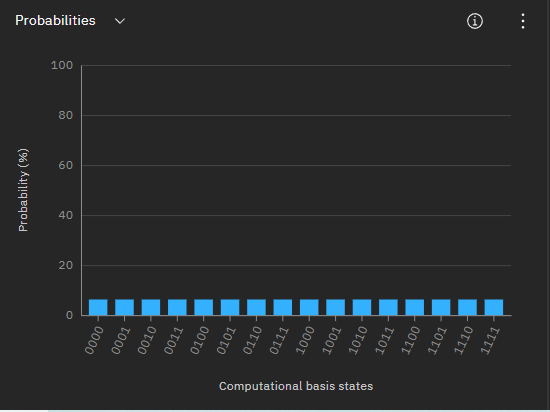

## Generación de números aleatorios (8 bits)

Demostrado un ejemplo de 4qubits de prueba pasamos al caso de 8 qubits, el cual es exactamente igual.

In [ ]:
qreg_q = QuantumRegister(9, 'q')
creg_c = ClassicalRegister(9, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[8])
circuit.h(qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[8])
circuit.h(qreg_q[2])
circuit.cx(qreg_q[2], qreg_q[8])
circuit.h(qreg_q[3])
circuit.cx(qreg_q[3], qreg_q[8])
circuit.h(qreg_q[4])
circuit.cx(qreg_q[4], qreg_q[8])
circuit.h(qreg_q[5])
circuit.cx(qreg_q[5], qreg_q[8])
circuit.h(qreg_q[6])
circuit.cx(qreg_q[6], qreg_q[8])
circuit.h(qreg_q[7])
circuit.cx(qreg_q[7], qreg_q[8])
circuit.h(qreg_q[8])
circuit.x(qreg_q[8])

circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])
circuit.measure(qreg_q[3], creg_c[3])
circuit.measure(qreg_q[4], creg_c[4])
circuit.measure(qreg_q[5], creg_c[5])
circuit.measure(qreg_q[6], creg_c[6])
circuit.measure(qreg_q[7], creg_c[7])
circuit.measure(qreg_q[8], creg_c[8])

circuit.draw()

┌───┐          ┌─┐                                                        »
q_0: ┤ H ├──■───────┤M├────────────────────────────────────────────────────────»
     ├───┤  │       └╥┘     ┌─┐                                                »
q_1: ┤ H ├──┼────■───╫──────┤M├────────────────────────────────────────────────»
     ├───┤  │    │   ║      └╥┘     ┌─┐                                        »
q_2: ┤ H ├──┼────┼───╫───■───╫──────┤M├────────────────────────────────────────»
     ├───┤  │    │   ║   │   ║      └╥┘     ┌─┐                                »
q_3: ┤ H ├──┼────┼───╫───┼───╫───■───╫──────┤M├────────────────────────────────»
     ├───┤  │    │   ║   │   ║   │   ║      └╥┘     ┌─┐                        »
q_4: ┤ H ├──┼────┼───╫───┼───╫───┼───╫───■───╫──────┤M├────────────────────────»
     ├───┤  │    │   ║   │   ║   │   ║   │   ║      └╥┘     ┌─┐                »
q_5: ┤ H ├──┼────┼───╫───┼───╫───┼───╫───┼───╫───■───╫──────┤M├────────────────»
     ├───┤  │    │   ║   │   ║   │   ║   │   ║   │   ║      └╥┘     ┌─┐        »
q_6: ┤ H ├──┼────┼───╫───┼───╫───┼───╫───┼───╫───┼───╫───■───╫──────┤M├────────»
     ├───┤  │    │   ║   │   ║   │   ║   │   ║   │   ║   │   ║      └╥┘     ┌─┐»
q_7: ┤ H ├──┼────┼───╫───┼───╫───┼───╫───┼───╫───┼───╫───┼───╫───■───╫──────┤M├»
     └───┘┌─┴─┐┌─┴─┐ ║ ┌─┴─┐ ║ ┌─┴─┐ ║ ┌─┴─┐ ║ ┌─┴─┐ ║ ┌─┴─┐ ║ ┌─┴─┐ ║ ┌───┐└╥┘»
q_8: ─────┤ X ├┤ X ├─╫─┤ X ├─╫─┤ X ├─╫─┤ X ├─╫─┤ X ├─╫─┤ X ├─╫─┤ X ├─╫─┤ H ├─╫─»
          └───┘└───┘ ║ └───┘ ║ └───┘ ║ └───┘ ║ └───┘ ║ └───┘ ║ └───┘ ║ └───┘ ║ »
c: 9/════════════════╩═══════╩═══════╩═══════╩═══════╩═══════╩═══════╩═══════╩═»
                     0       1       2       3       4       5       6       7 »
«             
«q_0: ────────
«             
«q_1: ────────
«             
«q_2: ────────
«             
«q_3: ────────
«             
«q_4: ────────
«             
«q_5: ────────
«             
«q_6: ────────
«             
«q_7: ────────
«     ┌───┐┌─┐
«q_8: ┤ X ├┤M├
«     └───┘└╥┘
«c: 9/══════╩═
«           8

/usr/local/lib/python3.7/dist-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


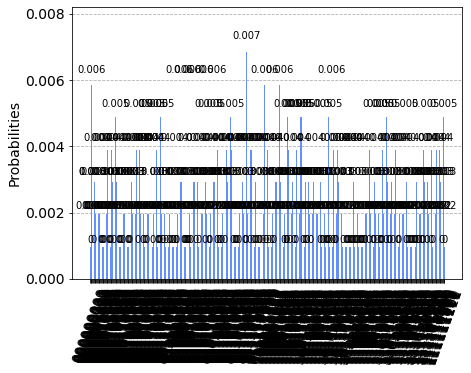

In [ ]:
sim = Aer.get_backend('aer_simulator') 
qobj = assemble(circuit)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

No podemos mostrar las probabilidades que nos da en IBM Quantum Composer, ya que no es compatible con tamaño de palabrás superiores a 6 qubits, a pesar de ello  y tal como se vió en el ejemplo de una plabra de 4qubits, obtendríamos una distribución uniforme con todos los estados igual de equiprobables.

## Sumador de 2 qbits

Antes de empezar a códificar el circuito cuántico que hará de sumador, recordamos todas las posibilidades que tenemos en un sumador de 2 bits binario:

* 0+0 = 00 (0 en decimal)
* 0+1 = 01 (1 en decimal)
* 1+0 = 01 (1 en decimal)
* 1+1 = 10 (2 en decimal)

Viendo esta comnbinación de bits en entrada/salida se puede apreciar que no solamente bastará con puertas NOT, por lo que vamos a requerir puertas más potentes. Para el segundoi bit podemos observar que hay dos casos, si ambos bits tienen el mismo valor(en cuyo caso dan 0 en el primer bit) o en el que ambos bits tiene valores diferentes (en cuyo caso resultan en un 1 en el primer bit), por lo tanto este primer bit se puede resolver con una XOR clásica, al estar trabajando en un circuito cuántico utilizaremos su equivalente una CNOT.

El problema es que como queremos que las puertas sean reversibles, necesitamos que este resultado se guarde en un tercer qubits, por lo que usaremos dos CNOT que relacionarán el tercer qubits con el primer y segundo qubits respectivamente.

Para el segundo qubit de la suma, tenemos otros dos casos, el caso en el que ambos qubits son 1 y por lo tanto el segundo qubit debe ser un 1 y el resto de casos donde tomarán un 0. Esto se resolverá con una puerta Toffoli con dos entradas, cuyo resultado se guardará en un cuarto qubit, haciendo así la puerta reversible.

Por último para inicializar los dos qubits a 1, usaremos dos puertas CNOT en cada qubit, ya que IBM Quantum Composer (y en general el estándar de los circuitos cuánticos) instancia las entradas a 0. Como resultado estono nos debería dar 10, ya que recordemos que 1+1 =10.

In [ ]:
#source: https://qiskit.org/textbook/ch-states/atoms-computation.html
qc_ha = QuantumCircuit(4,2)

# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove the this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove the this line. For b=1, leave it.
qc_ha.barrier()

# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)

# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3)
qc_ha.barrier()

# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value

qc_ha.draw()

┌───┐ ░                 ░       
q_0: ┤ X ├─░───■─────────■───░───────
     ├───┤ ░   │         │   ░       
q_1: ┤ X ├─░───┼────■────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1

Realizamos una simulación, la cual da el resultado que esperabamos.

/usr/local/lib/python3.7/dist-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


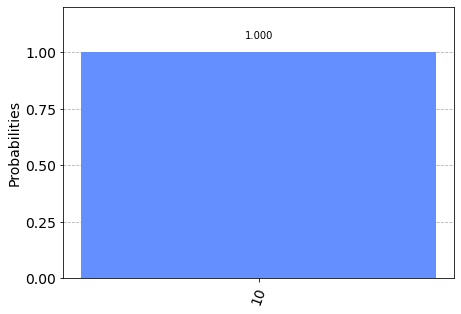

In [ ]:
sim = Aer.get_backend('aer_simulator') 
qobj = assemble(qc_ha)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

# PARTE 3: EJERCICIOS OPCIONALES

## 3.1 Multiplicación de Matrices

Partiendo del código inicial de la práctica, donde consideramos multiplicaciones de matrices de NxN y utilizamos hilos, de tal
manera que el (i,j)-ésimo hilo lee la fila i de la matriz A y la columna j de la
matriz B para calcular el dato C[i][j] de la matriz resultante.

En este código, solo se utiliza un bloque con 16x16 Threads y el reparto
de trabajo a los threads se ha definido de manera bidimensional.
En la ejecución serie de la CPU las operaciones relizadas son O(N3)
mientras que para la GPU se ha reducido a O(N2) las operaciones que
realiza cada thread.


In [79]:
%%writefile mat_mul_inicial.cu

#include <stdio.h>
#include <iostream>
#define N 16
void matrixMultCPU(int a[N][N], int b[N][N], int c[N][N]) {
  int n,m;
  for (int i = 0; i < N; i++) {
    for (int j = 0; j < N; j++) {
      int sum = 0;
      for (int k = 0; k < N; k++) {
        m = a[i][k];
        n = b[k][j];
        sum += m * n;
      }
      c[i][j] = sum;
    }
  }
}

__global__ void matrixMultGPU(int *a, int *b, int *c) {
  int k, sum = 0;
  int col = threadIdx.x + blockDim.x * blockIdx.x;
  int fil = threadIdx.y + blockDim.y * blockIdx.y;
  if (col < N && fil < N) {
    for (k = 0; k < N; k++) {
      sum += a[fil * N + k] * b[k * N + col];
    }
    c[fil * N + col] = sum;
  }
}

int main() {
    
  int a[N][N], b[N][N], c[N][N];
  int *dev_a, *dev_b, *dev_c;
  int i,j;
  //int cont;

  // Allocate CUDA events that we'll use for timing
  cudaEvent_t start;
  cudaEventCreate(&start);
  cudaEvent_t stop;
  cudaEventCreate(&stop);

  /* inicializando variables con datos*/
  for (i = 0; i < N; i++) {
    for (j = 0; j < N; j++) {
      a[i][j] = 1.0;
      b[i][j] = 2.0;
    }
  }

  int size = N * N * sizeof(int);
  cudaMalloc((void **) &dev_a, size);
  cudaMalloc((void **) &dev_b, size);
  cudaMalloc((void **) &dev_c, size);
  cudaMemcpy(dev_a, a, size, cudaMemcpyHostToDevice);
  cudaMemcpy(dev_b, b, size, cudaMemcpyHostToDevice);
  dim3 dimGrid(1, 1);
  dim3 dimBlock(N, N);


  // Record the start event
  cudaEventRecord(start, NULL);
  // Repita la ejecucion del kernel 1000 veces para eliminar efectos de arranque en frio
  int nIter = 1000;

  for (int j = 0; j < nIter; j++){
    //kernel <<< grid, threads >>>
    matrixMultGPU<<<dimGrid, dimBlock>>>(dev_a, dev_b, dev_c);
  }
    


  // Record the stop event
  cudaEventRecord(stop, NULL);

  // Wait for the stop event to complete
  cudaEventSynchronize(stop);
  float msecTotal = 0.0f;
  cudaEventElapsedTime(&msecTotal, start, stop);

  // Compute and print the performance
  float msecPerKernelExecution = msecTotal / nIter;
  printf("\n msecPerKernelExecution: %lf", msecPerKernelExecution);
  //double flopsPerMMull = 2.0 * N * N * N;
  float flopsPerMMull = 2.0 * N * N * N;
  printf("\n flopsPerMMull: %lf", flopsPerMMull);
  //double gigaFlops = (flopsPerMMull * 1.0e-9f) /(msecPerKernelExecution / 1000.0f);
  float gigaFlops = (flopsPerMMull * 1.0e-9f) /(msecPerKernelExecution / 1000.0f);
  printf("\n gigaFlops: %lf", gigaFlops);

  cudaMemcpy(c, dev_c, size, cudaMemcpyDeviceToHost);
  cudaFree(dev_a);
  cudaFree(dev_b);
  cudaFree(dev_c);

  float c_value = 2*N;
  int contError = 0, maxError = 0;
  //Comprobamos errores
   for (int i=0; i<N; i++){
    for (int j=0; j<N; j++){
        maxError=fmax(maxError,fabs(c[i][j]-c_value));
        if (c[i][j] != c_value) contError++; 
    }
  }

  std::cout << "\n Multiplicación de matrices cuadradas de " << N << " elementos" << std::endl;
  std::cout << "\n Número de errores: " <<contError << std::endl;
  std::cout << "\nMax error: " <<maxError << std::endl;

  // imprimiendo
  /*
  for (int y = 0; y < N; y++) {
    for (int x = 0; x < N; x++) {
      printf("[%d][%d]=%d ", y, x, c[y][x]);
    }
    printf("\n");
  }
  */
  return 0;
}

Overwriting mat_mul_inicial.cu


In [80]:
!nvprof ./mat_mul_inicial

==2567== NVPROF is profiling process 2567, command: ./mat_mul_inicial
==2567== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.

 msecPerKernelExecution: 0.017336
 flopsPerMMull: 65536.000000
 gigaFlops: 3.780376
 Multiplicación de matrices cuadradas de 32 elementos

 Número de errores: 0

Max error: 0
==2567== Profiling application: ./mat_mul_inicial
==2567== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   99.93%  12.055ms      1000  12.055us  11.744us  12.736us  matrixMultGPU(int*, int*, int*)
                    0.04%  5.1840us         2  2.5920us  2.4320us  2.7520us  [CUDA memcpy HtoD]
                    0.02%  2.9440us         1  2.9440us  2.9440us  2.9440us  [CUDA memcpy DtoH]
      API calls:   91.81%  200.78ms         2  100.39ms  1.0540us  200.78ms  cudaEventCreate
                    4.45%  9.7346ms      1000  9.7340us  4.2040us  1.3772ms  cudaLaunchKernel
                  

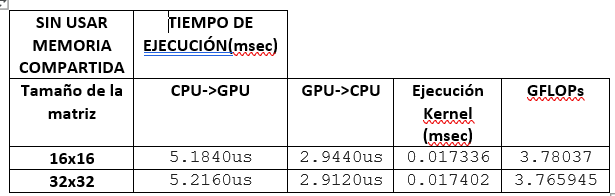

Vemos como el rendimiento es el mismo para matrices de 16*16 que de 32*32(que es el máximo pudiente utilizar solo un bloque). Esto es debido a que utilizando solo un bloque, este puede paralelizar todos sus hilos, utilice todos en la operación o no. En el caso de las matrices N=16 el proceso es el mismo que con N=32, solo que a utiliza menos hilos en paralelo, pero que tardan lo mismo. Vamos a ver cómo podemos optimizar esto para poder admitir matrices de mayor tamaño.


A partir de este código vamos a realizar diversas optimizaciones

### **3.1.1 Variar el número de hilos por bloque, ajustar el tamaño de particionado (tiling) y añadiendo uso de memoria compartida.**

En el kernel anterior el tamaño de las matrices estaba limitado al número de hilos maximo por bloque, que era de N=32 (32*32 = 1024 hilos ), ya que cada hilo se encargaba de una fila y una columna en la operación de multiplicación, lo cual resultaba en un único valor de la matriz final por hilo.

Ahora dividimos las matrices en tiles( o losas o mosaicos). Además hacemos dicha implementación utilizando simultáneamente memoria compartida.

El proceso es el siguiente.(Multiplicación matrices M*N)

Se cargan los mosaicos de entrada (A y B) desde memoria global a memoria
compartida en paralelo (todos los hilos contribuyen). Estos mosaicos reutilizan el
espacio de memoria compartida, **reduciendo el acceso a memoria global en un factor de N  si las losas tiene tamaño N*N**.

Hacemos __syncthreads() para evitar carrera de datos en la lectura de memoria, ya que cada hilo lee una casilla de la matriz M(fila) y otra de la N(columna).

Se calcula la multiplicación en fases:
Se calculan los productos y sumas. Hacemos un __syncthreads() para comprobar que todos los hilos del mosaico han terminado. Obtenemos un resultado temporal. Cargamos otros 2 mosaicos para la siguiente fase  repetimos el proceso.

Como resultado final, con la suma de los resultados intemedios, obtemos para cada casilla de la matriz resultado su valor final.

Cabe destacar que los hilos de un bloque se enumeran en orden "column major", esto es, hilos
consecutivos difieren en la dimensión x (no en la y), por eso en los mosaicos se
almacenan y acceden en memoria compartida de forma invertida traspuesta.

In [50]:
%%writefile tiles_mat_mul_inicial.cu

#include <stdio.h>
#include <iostream>
#define N 64
#define TILE_WIDTH 32 //Lo configuramos al máximo ya que 32*32=1024 hilos máximos por bloque

__global__ void MatrixMulKernel(float* d_M, float* d_N, float* d_P,int Width) {
    
  __shared__ float Mds[TILE_WIDTH][TILE_WIDTH];
  __shared__ float Nds[TILE_WIDTH][TILE_WIDTH];
  int bx = blockIdx.x; int by = blockIdx.y;
  int tx = threadIdx.x; int ty = threadIdx.y;

  //Identify the row and column of the d_P element to work on
  int Row = by * TILE_WIDTH + ty;
  int Col = bx * TILE_WIDTH + tx;

  float Pvalue = 0;
  // Loop over the d_M and d_N tiles required to compute d_P element
  for (int m = 0; m < Width/TILE_WIDTH; ++m) {
    // Coolaborative loading of d_M and d_N tiles into shared memory
    Mds[ty][tx] = d_M[Row*Width + m*TILE_WIDTH + tx];
    Nds[ty][tx] = d_N[(m*TILE_WIDTH + ty)*Width + Col];
    __syncthreads();

    for (int k = 0; k < TILE_WIDTH; ++k) {
      Pvalue += Mds[ty][k] * Nds[k][tx];
    }
    __syncthreads();
  }
  d_P[Row*Width + Col] = Pvalue;

}


int main() {
    
  float a[N][N], b[N][N], c[N][N];
  float *dev_a, *dev_b, *dev_c;
  int i,j;
  //int cont;

  // Allocate CUDA events that we'll use for timing
  cudaEvent_t start;
  cudaEventCreate(&start);
  cudaEvent_t stop;
  cudaEventCreate(&stop);

  /* inicializando variables con datos*/
  for (i = 0; i < N; i++) {
    for (j = 0; j < N; j++) {
      a[i][j] = 1.0;
      b[i][j] = 2.0;
    }
  }

  int size = N * N * sizeof(float);
  cudaMalloc((void **) &dev_a, size);
  cudaMalloc((void **) &dev_b, size);
  cudaMalloc((void **) &dev_c, size);
  cudaMemcpy(dev_a, a, size, cudaMemcpyHostToDevice);
  cudaMemcpy(dev_b, b, size, cudaMemcpyHostToDevice);
  dim3 dimGrid(N/TILE_WIDTH, N/TILE_WIDTH);
  dim3 dimBlock(TILE_WIDTH, TILE_WIDTH);


  

  // Record the start event
  cudaEventRecord(start, NULL);
  // Repita la ejecucion del kernel 1000 veces para eliminar efectos de arranque en frio
  int nIter = 1000;

  for (int j = 0; j < nIter; j++){
    //kernel <<< grid, threads >>>
    MatrixMulKernel<<<dimGrid, dimBlock>>>(dev_a, dev_b, dev_c,N);
  }
    


  // Record the stop event
  cudaEventRecord(stop, NULL);

  // Wait for the stop event to complete
  cudaEventSynchronize(stop);
  float msecTotal = 0.0f;
  cudaEventElapsedTime(&msecTotal, start, stop);

  // Compute and print the performance
  float msecPerKernelExecution = msecTotal / nIter;
  printf("\n msecPerKernelExecution: %lf", msecPerKernelExecution);
  //double flopsPerMMull = 2.0 * N * N * N;
  float flopsPerMMull = 2.0 * N * N * N;
  printf("\n flopsPerMMull: %lf", flopsPerMMull);
  //double gigaFlops = (flopsPerMMull * 1.0e-9f) /(msecPerKernelExecution / 1000.0f);
  float gigaFlops = (flopsPerMMull * 1.0e-9f) /(msecPerKernelExecution / 1000.0f);
  printf("\n gigaFlops: %lf", gigaFlops);

  cudaMemcpy(c, dev_c, size, cudaMemcpyDeviceToHost);
  cudaFree(dev_a);
  cudaFree(dev_b);
  cudaFree(dev_c);

  float c_value = 2*N;
  int contError = 0, maxError = 0;
  //Comprobamos errores
   for (int i=0; i<N; i++){
    for (int j=0; j<N; j++){
        maxError=fmax(maxError,fabs(c[i][j]-c_value));
        if (c[i][j] != c_value) contError++; 
    }
  }

  std::cout << "\n Multiplicación de matrices cuadradas de " << N << " elementos" << std::endl;
  std::cout << "\n Número de errores: " <<contError << std::endl;
  std::cout << "\nMax error: " <<maxError << std::endl;

  // imprimiendo
  /*
  for (int y = 0; y < N; y++) {
    for (int x = 0; x < N; x++) {
      printf("[%d][%d]=%d ", y, x, c[y][x]);
    }
    printf("\n");
  }
  */
  return 0;
}

Overwriting tiles_mat_mul_inicial.cu


Calculamos ahora la tabla de Tiempos varianto el tamaño de matrices en la macro del codigo superior:

In [51]:
!/usr/local/cuda/bin/nvcc -arch=sm_35 -rdc=true tiles_mat_mul_inicial.cu -o ./tiles_mat_mul_inicial -lcudadevrt
!./tiles_mat_mul_inicial
!nvprof ./tiles_mat_mul_inicial

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).

 msecPerKernelExecution: 0.017731
 flopsPerMMull: 524288.000000
 gigaFlops: 29.568829
 Multiplicación de matrices cuadradas de 64 elementos

 Número de errores: 0

Max error: 0
==1844== NVPROF is profiling process 1844, command: ./tiles_mat_mul_inicial
==1844== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
==1844== Warning: Profiling results might be incorrect with current version of nvcc compiler used to compile cuda app. Compile with nvcc compiler 9.0 or later version to get correct profiling results. Ignore this warning if code is already compiled with the recommended nvcc version 

 msecPerKernelExecution: 0.017810
 flopsPerMMull: 524288.000000
 gigaFlops: 29.437342
 Multiplicación de matrices cuadradas de 64 elementos

 Número de errore

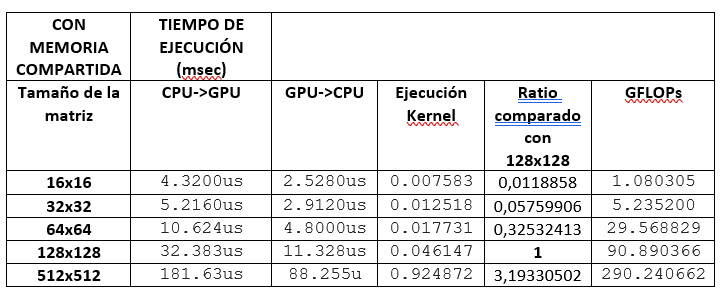

**¿Qué conclusiones puedes sacar a partir de estos números?**


Podemos ver como para matrices realmente grandes como es el caso de matrices 512*512 obtenemos un tiempo de ejecución del kernel que apenas llega a 1 milisegundo, lo cual es bastante impresionante y que muestra el gran potencial que tiene paralelizar estas operaciones tan constosas para un CPU mediante GPUS.

Siguiendo con el ejemplo de matrices 512*512 obtenemos uos 290 GFLOPS, es decir, 290x10^9 operaciones de coma flotante por segundo, lo cual es muy costoso para un CPU y requeriría de tiempos mucho mayores para la realizar tantas operaciones en coma flotante.

Comparando con la tabla de arriba, dado que no podemos utilizar matrices mayores de N=32, no podemos hacer una comparativa reseñable con el kernel dado, puesto que la aceleración se ve cuando tenemos muchos hilos, con varios bloques y en el caso anterior solo disponíamos de un bloque. Es decir, necesitaríamos otro kernel para poder hacer una comparativa de rendimiento(aunque para matrices de hasta 32*32 podemos asegurar que el primero es más rapido, también debido a no necesita coordinar bloques de hilos ni reducir suboperaciones)

### **3.1.2 Optimizaciones adicionales: Aplicar desenrollamiento de bucles (unrolling).**

En las GPUs hacer desenrollamiento de bucles parece acelarar la ejecución de algunos cálculos, especialemente cuando estos son grandes. Vamos a probar este unrolling a nuestro último kernel. Esto lo conseguimos utilizando #pragma unroll  antes del bucle a desenrollar


In [103]:
%%writefile tiles_mat_mul_unrolling.cu

#include <stdio.h>
#include <iostream>
#define N 512
#define TILE_WIDTH 32 
//Lo configuramos al máximo ya que 32*32=1024 hilos máximos por bloque

__global__ void MatrixMulKernel(float* d_M, float* d_N, float* d_P,int Width) {
    
  __shared__ float Mds[TILE_WIDTH][TILE_WIDTH];
  __shared__ float Nds[TILE_WIDTH][TILE_WIDTH];
  int bx = blockIdx.x; int by = blockIdx.y;
  int tx = threadIdx.x; int ty = threadIdx.y;

  //Identify the row and column of the d_P element to work on
  int Row = by * TILE_WIDTH + ty;
  int Col = bx * TILE_WIDTH + tx;

  float Pvalue = 0;
  // Loop over the d_M and d_N tiles required to compute d_P element
  for (int m = 0; m < Width/TILE_WIDTH; ++m) {
    // Coolaborative loading of d_M and d_N tiles into shared memory
    Mds[ty][tx] = d_M[Row*Width + m*TILE_WIDTH + tx];
    Nds[ty][tx] = d_N[(m*TILE_WIDTH + ty)*Width + Col];
    __syncthreads();

    #pragma unroll
    for (int k = 0; k < TILE_WIDTH; ++k) {
      Pvalue += Mds[ty][k] * Nds[k][tx];
    }
    __syncthreads();
  }
  d_P[Row*Width + Col] = Pvalue;

}


int main() {
    
  float a[N][N], b[N][N], c[N][N];
  float *dev_a, *dev_b, *dev_c;
  int i,j;
  //int cont;

  // Allocate CUDA events that we'll use for timing
  cudaEvent_t start;
  cudaEventCreate(&start);
  cudaEvent_t stop;
  cudaEventCreate(&stop);

  /* inicializando variables con datos*/
  for (i = 0; i < N; i++) {
    for (j = 0; j < N; j++) {
      a[i][j] = 1.0;
      b[i][j] = 2.0;
    }
  }

  int size = N * N * sizeof(float);
  cudaMalloc((void **) &dev_a, size);
  cudaMalloc((void **) &dev_b, size);
  cudaMalloc((void **) &dev_c, size);
  cudaMemcpy(dev_a, a, size, cudaMemcpyHostToDevice);
  cudaMemcpy(dev_b, b, size, cudaMemcpyHostToDevice);
  dim3 dimGrid(N/TILE_WIDTH, N/TILE_WIDTH);
  dim3 dimBlock(TILE_WIDTH, TILE_WIDTH);


  

  // Record the start event
  cudaEventRecord(start, NULL);
  // Repita la ejecucion del kernel 1000 veces para eliminar efectos de arranque en frio
  int nIter = 1000;

  for (int j = 0; j < nIter; j++){
    //kernel <<< grid, threads >>>
    MatrixMulKernel<<<dimGrid, dimBlock>>>(dev_a, dev_b, dev_c,N);
  }
    


  // Record the stop event
  cudaEventRecord(stop, NULL);

  // Wait for the stop event to complete
  cudaEventSynchronize(stop);
  float msecTotal = 0.0f;
  cudaEventElapsedTime(&msecTotal, start, stop);

  // Compute and print the performance
  float msecPerKernelExecution = msecTotal / nIter;
  printf("\n msecPerKernelExecution: %lf", msecPerKernelExecution);
  //double flopsPerMMull = 2.0 * N * N * N;
  float flopsPerMMull = 2.0 * N * N * N;
  printf("\n flopsPerMMull: %lf", flopsPerMMull);
  //double gigaFlops = (flopsPerMMull * 1.0e-9f) /(msecPerKernelExecution / 1000.0f);
  float gigaFlops = (flopsPerMMull * 1.0e-9f) /(msecPerKernelExecution / 1000.0f);
  printf("\n gigaFlops: %lf", gigaFlops);

  cudaMemcpy(c, dev_c, size, cudaMemcpyDeviceToHost);
  cudaFree(dev_a);
  cudaFree(dev_b);
  cudaFree(dev_c);

  float c_value = 2*N;
  int contError = 0, maxError = 0;
  //Comprobamos errores
   for (int i=0; i<N; i++){
    for (int j=0; j<N; j++){
        maxError=fmax(maxError,fabs(c[i][j]-c_value));
        if (c[i][j] != c_value) contError++; 
    }
  }

  std::cout << "\n Multiplicación de matrices cuadradas de " << N << " elementos" << std::endl;
  std::cout << "\n Número de errores: " <<contError << std::endl;
  std::cout << "\nMax error: " <<maxError << std::endl;

  // imprimiendo
  /*
  for (int y = 0; y < N; y++) {
    for (int x = 0; x < N; x++) {
      printf("[%d][%d]=%d ", y, x, c[y][x]);
    }
    printf("\n");
  }
  */
  return 0;
}

Overwriting tiles_mat_mul_unrolling.cu


In [104]:
!/usr/local/cuda/bin/nvcc -arch=sm_35 -rdc=true tiles_mat_mul_unrolling.cu  -o ./tiles_mat_mul_unrolling -lcudadevrt


nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).


In [106]:
!nvprof ./tiles_mat_mul_unrolling

==3158== NVPROF is profiling process 3158, command: ./tiles_mat_mul_unrolling
==3158== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
==3158== Warning: Profiling results might be incorrect with current version of nvcc compiler used to compile cuda app. Compile with nvcc compiler 9.0 or later version to get correct profiling results. Ignore this warning if code is already compiled with the recommended nvcc version 

 msecPerKernelExecution: 0.926327
 flopsPerMMull: 268435456.000000
 gigaFlops: 289.784607
 Multiplicación de matrices cuadradas de 512 elementos

 Número de errores: 0

Max error: 0
==3158== Profiling application: ./tiles_mat_mul_unrolling
==3158== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   99.97%  922.06ms      1000  922.06us  909.72us  944.92us  MatrixMulKernel(float*, float*, float*, int)
                    0.02%  182.05us         2  91.023us  90.719us  91.327us  

Observamos tras varias ejecuciones de varios tamaños de matrices que los tiempos y demás metricas estudiadas son similares a la optimización sin utilizar el #prama unrolling. De acuerdo a la guía de programación, esto puede ser debido a que por defecto, la GPU intenta hacer desenrollamiento de los bucles por defecto. Por lo que ahora, con el pragma, no estamos cambiando nada, ya que el la optimización del último kernel ya se incluía el unrolling.

Es por ello, que obviamos la realización de la tabla comparativa, dado que tras varias ejecuciones de todos los tamaños, se obtienen valores del mismo rango, lo que nos indica que la optimización ya se estaba realizando.

## 3.1.3 **Cambio a precisión double**

 Migramos el código del kernel optimizado  aritmética en
doble precisión

In [124]:
%%writefile tiles_mat_mul_double.cu

#include <stdio.h>
#include <iostream>
#define N 128
#define TILE_WIDTH 32 //Lo configuramos al máximo ya que 32*32=1024 hilos máximos por bloque

__global__ void MatrixMulKernel(double* d_M, double* d_N, double* d_P,int Width) {
    
  __shared__ double Mds[TILE_WIDTH][TILE_WIDTH];
  __shared__ double Nds[TILE_WIDTH][TILE_WIDTH];
  int bx = blockIdx.x; int by = blockIdx.y;
  int tx = threadIdx.x; int ty = threadIdx.y;

  //Identify the row and column of the d_P element to work on
  int Row = by * TILE_WIDTH + ty;
  int Col = bx * TILE_WIDTH + tx;

  double Pvalue = 0;
  // Loop over the d_M and d_N tiles required to compute d_P element
  for (int m = 0; m < Width/TILE_WIDTH; ++m) {
    // Coolaborative loading of d_M and d_N tiles into shared memory
    Mds[ty][tx] = d_M[Row*Width + m*TILE_WIDTH + tx];
    Nds[ty][tx] = d_N[(m*TILE_WIDTH + ty)*Width + Col];
    __syncthreads();

    for (int k = 0; k < TILE_WIDTH; ++k) {
      Pvalue += Mds[ty][k] * Nds[k][tx];
    }
    __syncthreads();
  }
  d_P[Row*Width + Col] = Pvalue;

}


int main() {
    
  double a[N][N], b[N][N], c[N][N];
  double *dev_a, *dev_b, *dev_c;
  int i,j;
  //int cont;

  // Allocate CUDA events that we'll use for timing
  cudaEvent_t start;
  cudaEventCreate(&start);
  cudaEvent_t stop;
  cudaEventCreate(&stop);

  /* inicializando variables con datos*/
  for (i = 0; i < N; i++) {
    for (j = 0; j < N; j++) {
      a[i][j] = 1.0;
      b[i][j] = 2.0;
    }
  }

  int size = N * N * sizeof(double);
  cudaMalloc((void **) &dev_a, size);
  cudaMalloc((void **) &dev_b, size);
  cudaMalloc((void **) &dev_c, size);
  cudaMemcpy(dev_a, a, size, cudaMemcpyHostToDevice);
  cudaMemcpy(dev_b, b, size, cudaMemcpyHostToDevice);
  dim3 dimGrid(N/TILE_WIDTH, N/TILE_WIDTH);
  dim3 dimBlock(TILE_WIDTH, TILE_WIDTH);


  

  // Record the start event
  cudaEventRecord(start, NULL);
  // Repita la ejecucion del kernel 1000 veces para eliminar efectos de arranque en frio
  int nIter = 1000;

  for (int j = 0; j < nIter; j++){
    //kernel <<< grid, threads >>>
    MatrixMulKernel<<<dimGrid, dimBlock>>>(dev_a, dev_b, dev_c,N);
  }
    


  // Record the stop event
  cudaEventRecord(stop, NULL);

  // Wait for the stop event to complete
  cudaEventSynchronize(stop);
  float msecTotal = 0.0f;
  cudaEventElapsedTime(&msecTotal, start, stop);

  // Compute and print the performance
  float msecPerKernelExecution = msecTotal / nIter;
  printf("\n msecPerKernelExecution: %lf", msecPerKernelExecution);
  //double flopsPerMMull = 2.0 * N * N * N;
  float flopsPerMMull = 2.0 * N * N * N;
  printf("\n flopsPerMMull: %lf", flopsPerMMull);
  //double gigaFlops = (flopsPerMMull * 1.0e-9f) /(msecPerKernelExecution / 1000.0f);
  float gigaFlops = (flopsPerMMull * 1.0e-9f) /(msecPerKernelExecution / 1000.0f);
  printf("\n gigaFlops: %lf", gigaFlops);

  cudaMemcpy(c, dev_c, size, cudaMemcpyDeviceToHost);
  cudaFree(dev_a);
  cudaFree(dev_b);
  cudaFree(dev_c);

  double c_value = 2*N;
  int contError = 0, maxError = 0;
  //Comprobamos errores
   for (int i=0; i<N; i++){
    for (int j=0; j<N; j++){
        maxError=fmax(maxError,fabs(c[i][j]-c_value));
        if (c[i][j] != c_value) contError++; 
    }
  }

  std::cout << "\n Multiplicación de matrices cuadradas de " << N << " elementos" << std::endl;
  std::cout << "\n Número de errores: " <<contError << std::endl;
  std::cout << "\nMax error: " <<maxError << std::endl;

  // imprimiendo
  /*
  for (int y = 0; y < N; y++) {
    for (int x = 0; x < N; x++) {
      printf("[%d][%d]=%d ", y, x, c[y][x]);
    }
    printf("\n");
  }
  */
  return 0;
}

Overwriting tiles_mat_mul_double.cu


In [125]:
!/usr/local/cuda/bin/nvcc -arch=sm_35 -rdc=true tiles_mat_mul_double.cu -o ./tiles_mat_mul_double -lcudadevrt
!./tiles_mat_mul_double
!nvprof ./tiles_mat_mul_double

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).

 msecPerKernelExecution: 0.049757
 flopsPerMMull: 4194304.000000
 gigaFlops: 84.296310
 Multiplicación de matrices cuadradas de 128 elementos

 Número de errores: 0

Max error: 0
==3729== NVPROF is profiling process 3729, command: ./tiles_mat_mul_double
==3729== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
==3729== Warning: Profiling results might be incorrect with current version of nvcc compiler used to compile cuda app. Compile with nvcc compiler 9.0 or later version to get correct profiling results. Ignore this warning if code is already compiled with the recommended nvcc version 

 msecPerKernelExecution: 0.049993
 flopsPerMMull: 4194304.000000
 gigaFlops: 83.897408
 Multiplicación de matrices cuadradas de 128 elementos

 Número de err

Vamos a ver la tabla comparativa

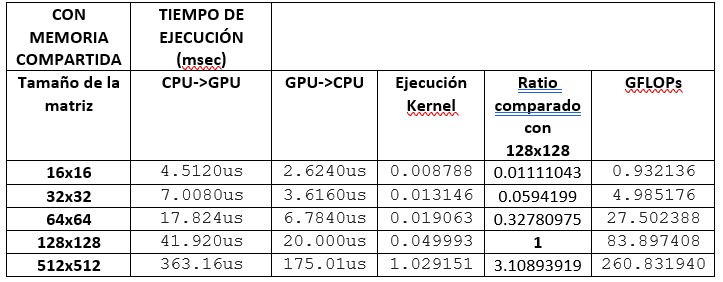

Vemos como las operaciones en coma flotente por unidad de tiempo(GFLOPs) se ven cosiderablemente castigadas. Esta diferencia es mayor a medida que aumentamos el tamaño de las matrices. La diferencia más grande las vemos en las matrices de 512*512.

También vemos que en consecuencia, los tiempos de acceso de GPU-CPU y viceversa también se ven bastantes penalizados. En el caso de N=512 se ven hasta duplicados. Como consecuencia de esto vemos que el tiempo de ejecución del kernel es mayor. Todo indica a que no es solo debido a una mayor precisión en los números. Muy probablemente debido a que a para tamaños grandes, llenemos la memoria compartida y/o registros(cuyo tamaño es limitado) y tengamos que hacer uso en conjunto de la memoria global(a pesar de haber especificado en los bloques solo compartida) para que la misma no se desborde y podamos obtener un cormportamiento correcto.
